<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - LUNA1</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_LUNA1.csv')
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1822,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1823,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1824,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1826 non-null   object 
 1   LUNA1-USD_ADJCLOSE  1005 non-null   float64
 2   LUNA1-USD_CLOSE     1005 non-null   float64
 3   LUNA1-USD_HIGH      1005 non-null   float64
 4   LUNA1-USD_LOW       1005 non-null   float64
 5   LUNA1-USD_OPEN      1005 non-null   float64
 6   LUNA1-USD_VOLUME    1005 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
LUNA1-USD_ADJCLOSE,821
LUNA1-USD_CLOSE,821
LUNA1-USD_HIGH,821
LUNA1-USD_LOW,821
LUNA1-USD_OPEN,821
LUNA1-USD_VOLUME,821


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LUNA1-USD_ADJCLOSE,1005.0,1.786033e+01,2.843780e+01,0.125335,3.027500e-01,1.064888e+00,2.515235e+01,1.164089e+02
LUNA1-USD_CLOSE,1005.0,1.786033e+01,2.843780e+01,0.125335,3.027500e-01,1.064888e+00,2.515235e+01,1.164089e+02
LUNA1-USD_HIGH,1005.0,1.876197e+01,2.972144e+01,0.137031,3.125700e-01,1.119922e+00,2.681221e+01,1.191846e+02
LUNA1-USD_LOW,1005.0,1.688641e+01,2.705967e+01,0.120116,2.910530e-01,1.050174e+00,2.088452e+01,1.141129e+02
LUNA1-USD_OPEN,1005.0,1.777017e+01,2.833693e+01,0.125335,3.027450e-01,1.064939e+00,2.197240e+01,1.164192e+02
LUNA1-USD_VOLUME,1005.0,5.790605e+08,1.001971e+09,170533.000000,3.319204e+06,1.962408e+07,7.414480e+08,6.147403e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
1065,2020-03-26,0.148270,0.148270,0.149823,0.144710,0.147433,3.790205e+06
1520,2021-06-24,5.454392,5.454392,5.593686,5.007867,5.194719,1.289407e+08
379,2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
822,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
903,2019-10-16,0.552323,0.552323,0.598356,0.538839,0.596644,9.681470e+05
1525,2021-06-29,5.986422,5.986422,6.323179,5.405177,5.534818,1.624115e+08
1454,2021-04-19,13.906250,13.906250,16.312174,13.170743,13.382236,6.303249e+08
1630,2021-10-12,37.597832,37.597832,39.204704,35.330170,39.204704,1.196284e+09
289,2018-02-09,NaN,NaN,NaN,NaN,NaN,NaN
1311,2020-11-27,0.383946,0.383946,0.405784,0.348762,0.349363,1.226854e+07


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
816,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN
817,2019-07-22,NaN,NaN,NaN,NaN,NaN,NaN
818,2019-07-23,NaN,NaN,NaN,NaN,NaN,NaN
819,2019-07-24,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,1.208858e+07
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1.643709e+06
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3.966802e+06
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1.820705e+06
...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,1.208858e+07
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1.643709e+06
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3.966802e+06
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1.820705e+06
...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,12088575.0,28.384495,45.293983
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6033446.0,1.287232,14.809257
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1643709.0,2.951865,10.650939
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3966802.0,2.501896,17.057227
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1820705.0,0.018699,8.515623


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

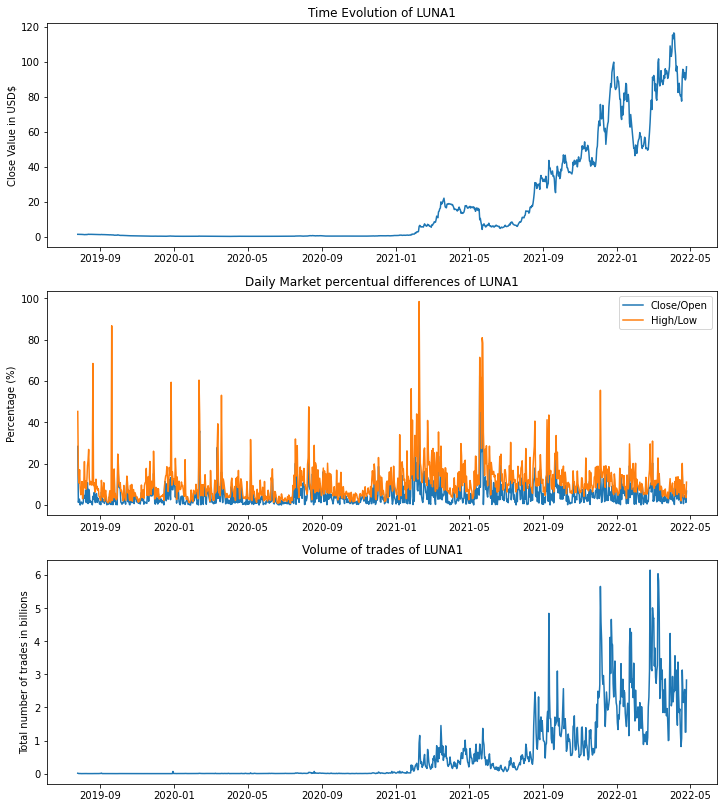

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-10-01']
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
798,2021-10-01,37.737476,37.737476,39.975315,36.558472,38.830688,1.270901e+09,2.896887,9.346242
799,2021-10-02,41.476894,41.476894,43.512802,37.114410,37.749657,1.495129e+09,8.986299,17.239643
800,2021-10-03,42.742489,42.742489,46.088326,41.519005,41.519005,2.042995e+09,2.862454,11.005371
801,2021-10-04,46.723358,46.723358,49.449837,41.610016,42.740257,2.567464e+09,8.524860,18.841187
802,2021-10-05,44.708672,44.708672,47.179146,43.645386,46.788422,1.359206e+09,4.651782,8.096526
...,...,...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09,4.558698,9.864323
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09,3.093242,6.596611
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09,4.618125,5.265239
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09,1.240388,3.574730


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,46.723358,42.742489,41.476894,37.737476,44.708672,2021-10-05
1,44.708672,46.723358,42.742489,41.476894,41.948692,2021-10-06
2,41.948692,44.708672,46.723358,42.742489,46.542950,2021-10-07
3,46.542950,41.948692,44.708672,46.723358,43.286179,2021-10-08
4,43.286179,46.542950,41.948692,44.708672,42.473362,2021-10-09
...,...,...,...,...,...,...
198,94.955681,95.615509,91.074356,77.427139,90.799156,2022-04-21
199,90.799156,94.955681,95.615509,91.074356,93.682289,2022-04-22
200,93.682289,90.799156,94.955681,95.615509,89.534752,2022-04-23
201,89.534752,93.682289,90.799156,94.955681,90.560234,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((203,), (203, 4, 1), (203,))

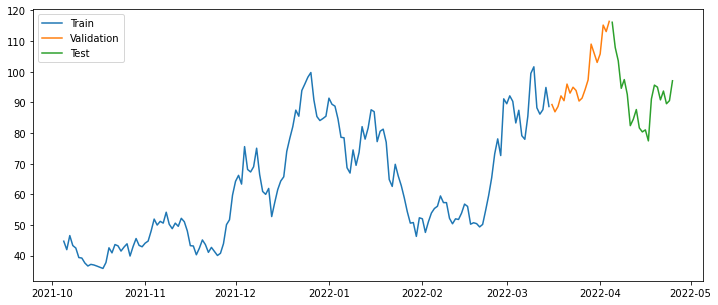

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((4, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
17/17 - 1s - loss: 4131.7207 - mean_absolute_error: 61.7618 - val_loss: 9616.4814 - val_mean_absolute_error: 97.6348 - 1s/epoch - 88ms/step
Epoch 2/50
17/17 - 0s - loss: 3993.7593 - mean_absolute_error: 60.6299 - val_loss: 9349.1689 - val_mean_absolute_error: 96.2556 - 54ms/epoch - 3ms/step
Epoch 3/50
17/17 - 0s - loss: 3771.6621 - mean_absolute_error: 58.8217 - val_loss: 8873.8701 - val_mean_absolute_error: 93.7535 - 48ms/epoch - 3ms/step
Epoch 4/50
17/17 - 0s - loss: 3354.2732 - mean_absolute_error: 55.2488 - val_loss: 7992.3384 - val_mean_absolute_error: 88.9259 - 46ms/epoch - 3ms/step
Epoch 5/50
17/17 - 0s - loss: 2589.8079 - mean_absolute_error: 47.9665 - val_loss: 6336.7295 - val_mean_absolute_error: 79.0610 - 45ms/epoch - 3ms/step
Epoch 6/50
17/17 - 0s - loss: 1429.7942 - mean_absolute_error: 34.0645 - val_loss: 3863.4468 - val_mean_absolute_error: 61.4568 - 45ms/epoch - 3ms/step
Epoch 7/50
17/17 - 0s -

Epoch 5/50
17/17 - 0s - loss: 495.4659 - mean_absolute_error: 19.3612 - val_loss: 954.0153 - val_mean_absolute_error: 29.4970 - 42ms/epoch - 2ms/step
Epoch 6/50
17/17 - 0s - loss: 423.3008 - mean_absolute_error: 18.2477 - val_loss: 800.4014 - val_mean_absolute_error: 26.7728 - 43ms/epoch - 3ms/step
Epoch 7/50
17/17 - 0s - loss: 400.1590 - mean_absolute_error: 17.3008 - val_loss: 458.1414 - val_mean_absolute_error: 19.3555 - 44ms/epoch - 3ms/step
Epoch 8/50
17/17 - 0s - loss: 487.1383 - mean_absolute_error: 19.0347 - val_loss: 597.6183 - val_mean_absolute_error: 22.6656 - 42ms/epoch - 2ms/step
Epoch 9/50
17/17 - 0s - loss: 341.9895 - mean_absolute_error: 15.7821 - val_loss: 456.5505 - val_mean_absolute_error: 19.3166 - 44ms/epoch - 3ms/step
Epoch 10/50
17/17 - 0s - loss: 350.8163 - mean_absolute_error: 16.4978 - val_loss: 478.0063 - val_mean_absolute_error: 19.8579 - 43ms/epoch - 3ms/step
Epoch 11/50
17/17 - 0s - loss: 393.6246 - mean_absolute_error: 16.8812 - val_loss: 413.3130 - val_m

17/17 - 0s - loss: 561.2770 - mean_absolute_error: 20.5144 - val_loss: 806.1744 - val_mean_absolute_error: 26.8736 - 42ms/epoch - 2ms/step
Epoch 10/50
17/17 - 0s - loss: 556.6289 - mean_absolute_error: 20.4397 - val_loss: 805.4990 - val_mean_absolute_error: 26.8610 - 42ms/epoch - 2ms/step
Epoch 11/50
17/17 - 0s - loss: 572.3808 - mean_absolute_error: 20.7570 - val_loss: 760.9087 - val_mean_absolute_error: 26.0178 - 43ms/epoch - 3ms/step
Epoch 12/50
17/17 - 0s - loss: 573.6694 - mean_absolute_error: 20.6828 - val_loss: 854.2405 - val_mean_absolute_error: 27.7535 - 42ms/epoch - 2ms/step
Epoch 13/50
17/17 - 0s - loss: 535.1141 - mean_absolute_error: 20.1023 - val_loss: 826.1670 - val_mean_absolute_error: 27.2430 - 42ms/epoch - 2ms/step
Epoch 14/50
17/17 - 0s - loss: 554.2739 - mean_absolute_error: 20.7331 - val_loss: 642.3304 - val_mean_absolute_error: 23.6294 - 42ms/epoch - 2ms/step
Epoch 15/50
17/17 - 0s - loss: 623.6638 - mean_absolute_error: 21.4272 - val_loss: 871.4105 - val_mean_abs

Epoch 13/50
17/17 - 0s - loss: 583.7825 - mean_absolute_error: 20.8740 - val_loss: 770.5638 - val_mean_absolute_error: 26.2027 - 44ms/epoch - 3ms/step
Epoch 14/50
17/17 - 0s - loss: 578.4412 - mean_absolute_error: 20.7873 - val_loss: 779.5872 - val_mean_absolute_error: 26.3743 - 44ms/epoch - 3ms/step
Epoch 15/50
17/17 - 0s - loss: 573.1791 - mean_absolute_error: 20.7012 - val_loss: 788.5784 - val_mean_absolute_error: 26.5442 - 43ms/epoch - 3ms/step
Epoch 16/50
17/17 - 0s - loss: 567.9915 - mean_absolute_error: 20.6182 - val_loss: 797.3706 - val_mean_absolute_error: 26.7093 - 43ms/epoch - 3ms/step
Epoch 17/50
17/17 - 0s - loss: 562.9545 - mean_absolute_error: 20.5373 - val_loss: 805.9967 - val_mean_absolute_error: 26.8703 - 43ms/epoch - 3ms/step
Epoch 18/50
17/17 - 0s - loss: 558.0580 - mean_absolute_error: 20.4579 - val_loss: 814.4606 - val_mean_absolute_error: 27.0273 - 43ms/epoch - 3ms/step
Epoch 19/50
17/17 - 0s - loss: 553.2952 - mean_absolute_error: 20.3801 - val_loss: 822.7557 - 

Epoch 17/50
17/17 - 0s - loss: 649.7116 - mean_absolute_error: 21.9171 - val_loss: 696.8143 - val_mean_absolute_error: 24.7554 - 43ms/epoch - 3ms/step
Epoch 18/50
17/17 - 0s - loss: 627.7570 - mean_absolute_error: 21.5748 - val_loss: 697.0697 - val_mean_absolute_error: 24.7606 - 43ms/epoch - 3ms/step
Epoch 19/50
17/17 - 0s - loss: 624.5934 - mean_absolute_error: 21.5185 - val_loss: 714.6510 - val_mean_absolute_error: 25.1131 - 42ms/epoch - 2ms/step
Epoch 20/50
17/17 - 0s - loss: 614.3590 - mean_absolute_error: 21.3606 - val_loss: 729.0639 - val_mean_absolute_error: 25.3984 - 42ms/epoch - 2ms/step
Epoch 21/50
17/17 - 0s - loss: 601.0432 - mean_absolute_error: 21.1536 - val_loss: 716.9849 - val_mean_absolute_error: 25.1595 - 44ms/epoch - 3ms/step
Epoch 22/50
17/17 - 0s - loss: 609.1390 - mean_absolute_error: 21.2685 - val_loss: 747.6688 - val_mean_absolute_error: 25.7621 - 44ms/epoch - 3ms/step
Epoch 23/50
17/17 - 0s - loss: 599.4042 - mean_absolute_error: 21.1449 - val_loss: 745.5590 - 

Epoch 16/50
17/17 - 0s - loss: 678.2149 - mean_absolute_error: 22.3485 - val_loss: 644.2991 - val_mean_absolute_error: 23.6710 - 45ms/epoch - 3ms/step
Epoch 17/50
17/17 - 0s - loss: 662.7375 - mean_absolute_error: 22.1108 - val_loss: 653.0394 - val_mean_absolute_error: 23.8549 - 43ms/epoch - 3ms/step
Epoch 18/50
17/17 - 0s - loss: 655.4669 - mean_absolute_error: 21.9965 - val_loss: 662.5856 - val_mean_absolute_error: 24.0541 - 44ms/epoch - 3ms/step
Epoch 19/50
17/17 - 0s - loss: 648.8280 - mean_absolute_error: 21.8954 - val_loss: 673.2623 - val_mean_absolute_error: 24.2751 - 44ms/epoch - 3ms/step
Epoch 20/50
17/17 - 0s - loss: 641.7458 - mean_absolute_error: 21.7877 - val_loss: 682.1338 - val_mean_absolute_error: 24.4571 - 43ms/epoch - 3ms/step
Epoch 21/50
17/17 - 0s - loss: 635.7305 - mean_absolute_error: 21.6949 - val_loss: 690.1549 - val_mean_absolute_error: 24.6205 - 44ms/epoch - 3ms/step
Epoch 22/50
17/17 - 0s - loss: 630.3987 - mean_absolute_error: 21.6119 - val_loss: 697.6736 - 

Epoch 15/50
17/17 - 0s - loss: 692.8571 - mean_absolute_error: 22.5761 - val_loss: 626.3033 - val_mean_absolute_error: 23.2878 - 43ms/epoch - 3ms/step
Epoch 16/50
17/17 - 0s - loss: 676.5399 - mean_absolute_error: 22.3228 - val_loss: 644.7116 - val_mean_absolute_error: 23.6797 - 45ms/epoch - 3ms/step
Epoch 17/50
17/17 - 0s - loss: 663.0190 - mean_absolute_error: 22.1119 - val_loss: 661.6867 - val_mean_absolute_error: 24.0355 - 43ms/epoch - 3ms/step
Epoch 18/50
17/17 - 0s - loss: 650.9731 - mean_absolute_error: 21.9264 - val_loss: 676.6464 - val_mean_absolute_error: 24.3447 - 43ms/epoch - 3ms/step
Epoch 19/50
17/17 - 0s - loss: 640.5340 - mean_absolute_error: 21.7672 - val_loss: 689.6738 - val_mean_absolute_error: 24.6108 - 44ms/epoch - 3ms/step
Epoch 20/50
17/17 - 0s - loss: 631.6145 - mean_absolute_error: 21.6293 - val_loss: 701.3249 - val_mean_absolute_error: 24.8463 - 43ms/epoch - 3ms/step
Epoch 21/50
17/17 - 0s - loss: 623.8200 - mean_absolute_error: 21.5074 - val_loss: 711.7806 - 

Epoch 19/50
17/17 - 0s - loss: 661.9790 - mean_absolute_error: 22.0943 - val_loss: 660.8923 - val_mean_absolute_error: 24.0189 - 44ms/epoch - 3ms/step
Epoch 20/50
17/17 - 0s - loss: 652.9773 - mean_absolute_error: 21.9545 - val_loss: 672.1161 - val_mean_absolute_error: 24.2514 - 43ms/epoch - 3ms/step
Epoch 21/50
17/17 - 0s - loss: 645.2285 - mean_absolute_error: 21.8352 - val_loss: 682.5887 - val_mean_absolute_error: 24.4664 - 44ms/epoch - 3ms/step
Epoch 22/50
17/17 - 0s - loss: 638.1931 - mean_absolute_error: 21.7274 - val_loss: 691.9696 - val_mean_absolute_error: 24.6574 - 45ms/epoch - 3ms/step
Epoch 23/50
17/17 - 0s - loss: 631.9668 - mean_absolute_error: 21.6309 - val_loss: 700.4751 - val_mean_absolute_error: 24.8292 - 44ms/epoch - 3ms/step
Epoch 24/50
17/17 - 0s - loss: 626.4139 - mean_absolute_error: 21.5441 - val_loss: 708.2987 - val_mean_absolute_error: 24.9863 - 45ms/epoch - 3ms/step
Epoch 25/50
17/17 - 0s - loss: 621.3893 - mean_absolute_error: 21.4648 - val_loss: 715.5276 - 

Epoch 23/50
17/17 - 0s - loss: 864.2316 - mean_absolute_error: 25.3593 - val_loss: 920.2656 - val_mean_absolute_error: 28.9185 - 43ms/epoch - 3ms/step
Epoch 24/50
17/17 - 0s - loss: 553.9616 - mean_absolute_error: 20.4856 - val_loss: 757.5923 - val_mean_absolute_error: 25.9540 - 43ms/epoch - 3ms/step
Epoch 25/50
17/17 - 0s - loss: 590.4641 - mean_absolute_error: 20.9430 - val_loss: 718.6609 - val_mean_absolute_error: 25.1928 - 45ms/epoch - 3ms/step
Epoch 26/50
17/17 - 0s - loss: 612.4023 - mean_absolute_error: 21.3018 - val_loss: 778.3065 - val_mean_absolute_error: 26.3500 - 44ms/epoch - 3ms/step
Epoch 27/50
17/17 - 0s - loss: 584.0500 - mean_absolute_error: 20.8700 - val_loss: 776.3048 - val_mean_absolute_error: 26.3120 - 44ms/epoch - 3ms/step
Epoch 28/50
17/17 - 0s - loss: 581.3639 - mean_absolute_error: 20.8161 - val_loss: 784.9274 - val_mean_absolute_error: 26.4753 - 43ms/epoch - 3ms/step
Epoch 29/50
17/17 - 0s - loss: 576.3036 - mean_absolute_error: 20.7350 - val_loss: 798.1823 - 

Epoch 27/50
17/17 - 0s - loss: 714.1389 - mean_absolute_error: 22.9036 - val_loss: 592.7919 - val_mean_absolute_error: 22.5568 - 43ms/epoch - 3ms/step
Epoch 28/50
17/17 - 0s - loss: 709.8022 - mean_absolute_error: 22.8338 - val_loss: 599.0273 - val_mean_absolute_error: 22.6946 - 43ms/epoch - 3ms/step
Epoch 29/50
17/17 - 0s - loss: 705.4289 - mean_absolute_error: 22.7641 - val_loss: 605.3300 - val_mean_absolute_error: 22.8330 - 44ms/epoch - 3ms/step
Epoch 30/50
17/17 - 0s - loss: 701.0313 - mean_absolute_error: 22.6948 - val_loss: 611.7151 - val_mean_absolute_error: 22.9724 - 45ms/epoch - 3ms/step
Epoch 31/50
17/17 - 0s - loss: 696.6027 - mean_absolute_error: 22.6262 - val_loss: 618.1945 - val_mean_absolute_error: 23.1130 - 44ms/epoch - 3ms/step
Epoch 32/50
17/17 - 0s - loss: 692.1342 - mean_absolute_error: 22.5576 - val_loss: 624.7736 - val_mean_absolute_error: 23.2549 - 44ms/epoch - 3ms/step
Epoch 33/50
17/17 - 0s - loss: 687.6212 - mean_absolute_error: 22.4884 - val_loss: 631.4598 - 

Epoch 31/100
17/17 - 0s - loss: 51.0596 - mean_absolute_error: 5.4996 - val_loss: 179.3197 - val_mean_absolute_error: 10.4639 - 44ms/epoch - 3ms/step
Epoch 32/100
17/17 - 0s - loss: 50.3351 - mean_absolute_error: 5.4581 - val_loss: 177.7058 - val_mean_absolute_error: 10.4038 - 43ms/epoch - 3ms/step
Epoch 33/100
17/17 - 0s - loss: 49.5702 - mean_absolute_error: 5.4046 - val_loss: 176.1634 - val_mean_absolute_error: 10.3498 - 42ms/epoch - 2ms/step
Epoch 34/100
17/17 - 0s - loss: 48.7220 - mean_absolute_error: 5.3507 - val_loss: 173.9344 - val_mean_absolute_error: 10.2612 - 44ms/epoch - 3ms/step
Epoch 35/100
17/17 - 0s - loss: 48.0392 - mean_absolute_error: 5.3107 - val_loss: 172.4836 - val_mean_absolute_error: 10.2045 - 43ms/epoch - 3ms/step
Epoch 36/100
17/17 - 0s - loss: 47.3467 - mean_absolute_error: 5.2560 - val_loss: 171.4416 - val_mean_absolute_error: 10.1696 - 42ms/epoch - 2ms/step
Epoch 37/100
17/17 - 0s - loss: 46.5745 - mean_absolute_error: 5.2053 - val_loss: 169.8468 - val_mea

Epoch 86/100
17/17 - 0s - loss: 34.5354 - mean_absolute_error: 4.4049 - val_loss: 170.7750 - val_mean_absolute_error: 9.5652 - 42ms/epoch - 2ms/step
Epoch 87/100
17/17 - 0s - loss: 34.5538 - mean_absolute_error: 4.4071 - val_loss: 170.9026 - val_mean_absolute_error: 9.5585 - 42ms/epoch - 2ms/step
Epoch 88/100
17/17 - 0s - loss: 34.6075 - mean_absolute_error: 4.4112 - val_loss: 171.1405 - val_mean_absolute_error: 9.5576 - 43ms/epoch - 3ms/step
Epoch 89/100
17/17 - 0s - loss: 34.6580 - mean_absolute_error: 4.4137 - val_loss: 171.5686 - val_mean_absolute_error: 9.5660 - 43ms/epoch - 3ms/step
Epoch 90/100
17/17 - 0s - loss: 34.6503 - mean_absolute_error: 4.4121 - val_loss: 172.4550 - val_mean_absolute_error: 9.6055 - 43ms/epoch - 3ms/step
Epoch 91/100
17/17 - 0s - loss: 34.4316 - mean_absolute_error: 4.3908 - val_loss: 171.8373 - val_mean_absolute_error: 9.5866 - 41ms/epoch - 2ms/step
Epoch 92/100
17/17 - 0s - loss: 34.2206 - mean_absolute_error: 4.3787 - val_loss: 174.2719 - val_mean_abso

Epoch 40/100
17/17 - 0s - loss: 92.6682 - mean_absolute_error: 7.2538 - val_loss: 277.6103 - val_mean_absolute_error: 14.0267 - 43ms/epoch - 3ms/step
Epoch 41/100
17/17 - 0s - loss: 91.0953 - mean_absolute_error: 7.2303 - val_loss: 282.6451 - val_mean_absolute_error: 14.1908 - 44ms/epoch - 3ms/step
Epoch 42/100
17/17 - 0s - loss: 92.6472 - mean_absolute_error: 7.2152 - val_loss: 281.4648 - val_mean_absolute_error: 14.1673 - 44ms/epoch - 3ms/step
Epoch 43/100
17/17 - 0s - loss: 90.4584 - mean_absolute_error: 7.1923 - val_loss: 280.6865 - val_mean_absolute_error: 14.1204 - 43ms/epoch - 3ms/step
Epoch 44/100
17/17 - 0s - loss: 94.9495 - mean_absolute_error: 7.2817 - val_loss: 286.0221 - val_mean_absolute_error: 14.3629 - 42ms/epoch - 2ms/step
Epoch 45/100
17/17 - 0s - loss: 90.0122 - mean_absolute_error: 7.1746 - val_loss: 278.6632 - val_mean_absolute_error: 14.0573 - 43ms/epoch - 3ms/step
Epoch 46/100
17/17 - 0s - loss: 94.4907 - mean_absolute_error: 7.2279 - val_loss: 284.9435 - val_mea

Epoch 95/100
17/17 - 0s - loss: 80.0995 - mean_absolute_error: 6.5589 - val_loss: 274.6264 - val_mean_absolute_error: 13.8537 - 43ms/epoch - 3ms/step
Epoch 96/100
17/17 - 0s - loss: 79.7797 - mean_absolute_error: 6.6796 - val_loss: 288.0920 - val_mean_absolute_error: 14.3389 - 43ms/epoch - 3ms/step
Epoch 97/100
17/17 - 0s - loss: 80.2994 - mean_absolute_error: 6.5207 - val_loss: 265.8215 - val_mean_absolute_error: 13.5204 - 46ms/epoch - 3ms/step
Epoch 98/100
17/17 - 0s - loss: 81.6463 - mean_absolute_error: 6.7761 - val_loss: 307.4001 - val_mean_absolute_error: 14.9967 - 44ms/epoch - 3ms/step
Epoch 99/100
17/17 - 0s - loss: 78.5294 - mean_absolute_error: 6.5516 - val_loss: 229.8044 - val_mean_absolute_error: 12.1105 - 43ms/epoch - 3ms/step
Epoch 100/100
17/17 - 0s - loss: 81.5704 - mean_absolute_error: 6.9357 - val_loss: 312.7026 - val_mean_absolute_error: 15.1650 - 45ms/epoch - 3ms/step
MSE=167.592
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.023000000000000003
Epoch

Epoch 49/100
17/17 - 0s - loss: 486.4573 - mean_absolute_error: 19.2152 - val_loss: 942.9948 - val_mean_absolute_error: 29.3089 - 44ms/epoch - 3ms/step
Epoch 50/100
17/17 - 0s - loss: 485.0847 - mean_absolute_error: 19.1896 - val_loss: 945.7559 - val_mean_absolute_error: 29.3560 - 43ms/epoch - 3ms/step
Epoch 51/100
17/17 - 0s - loss: 483.7330 - mean_absolute_error: 19.1644 - val_loss: 948.4716 - val_mean_absolute_error: 29.4022 - 43ms/epoch - 3ms/step
Epoch 52/100
17/17 - 0s - loss: 482.4075 - mean_absolute_error: 19.1399 - val_loss: 951.1282 - val_mean_absolute_error: 29.4473 - 43ms/epoch - 3ms/step
Epoch 53/100
17/17 - 0s - loss: 481.1118 - mean_absolute_error: 19.1159 - val_loss: 953.7421 - val_mean_absolute_error: 29.4917 - 43ms/epoch - 3ms/step
Epoch 54/100
17/17 - 0s - loss: 479.8393 - mean_absolute_error: 19.0923 - val_loss: 956.2858 - val_mean_absolute_error: 29.5348 - 43ms/epoch - 3ms/step
Epoch 55/100
17/17 - 0s - loss: 478.6044 - mean_absolute_error: 19.0693 - val_loss: 958.

Epoch 3/100
17/17 - 0s - loss: 979.1885 - mean_absolute_error: 26.7139 - val_loss: 552.4892 - val_mean_absolute_error: 21.6450 - 45ms/epoch - 3ms/step
Epoch 4/100
17/17 - 0s - loss: 767.8820 - mean_absolute_error: 23.7225 - val_loss: 746.8863 - val_mean_absolute_error: 25.7469 - 44ms/epoch - 3ms/step
Epoch 5/100
17/17 - 0s - loss: 615.4453 - mean_absolute_error: 21.4397 - val_loss: 608.8142 - val_mean_absolute_error: 22.9092 - 44ms/epoch - 3ms/step
Epoch 6/100
17/17 - 0s - loss: 674.3555 - mean_absolute_error: 22.2703 - val_loss: 606.5061 - val_mean_absolute_error: 22.8587 - 45ms/epoch - 3ms/step
Epoch 7/100
17/17 - 0s - loss: 681.8568 - mean_absolute_error: 22.4035 - val_loss: 644.8724 - val_mean_absolute_error: 23.6831 - 43ms/epoch - 3ms/step
Epoch 8/100
17/17 - 0s - loss: 660.0090 - mean_absolute_error: 22.0736 - val_loss: 650.4968 - val_mean_absolute_error: 23.8015 - 43ms/epoch - 3ms/step
Epoch 9/100
17/17 - 0s - loss: 654.0540 - mean_absolute_error: 21.9783 - val_loss: 658.1987 - 

Epoch 57/100
17/17 - 0s - loss: 442.4390 - mean_absolute_error: 18.2151 - val_loss: 803.9260 - val_mean_absolute_error: 26.8317 - 43ms/epoch - 3ms/step
Epoch 58/100
17/17 - 0s - loss: 445.1255 - mean_absolute_error: 18.2987 - val_loss: 814.7723 - val_mean_absolute_error: 27.0331 - 43ms/epoch - 3ms/step
Epoch 59/100
17/17 - 0s - loss: 438.5671 - mean_absolute_error: 18.1338 - val_loss: 800.2790 - val_mean_absolute_error: 26.7637 - 44ms/epoch - 3ms/step
Epoch 60/100
17/17 - 0s - loss: 441.3964 - mean_absolute_error: 18.2235 - val_loss: 811.0568 - val_mean_absolute_error: 26.9643 - 45ms/epoch - 3ms/step
Epoch 61/100
17/17 - 0s - loss: 434.7393 - mean_absolute_error: 18.0440 - val_loss: 794.6403 - val_mean_absolute_error: 26.6581 - 43ms/epoch - 3ms/step
Epoch 62/100
17/17 - 0s - loss: 438.1603 - mean_absolute_error: 18.1347 - val_loss: 806.0626 - val_mean_absolute_error: 26.8715 - 43ms/epoch - 3ms/step
Epoch 63/100
17/17 - 0s - loss: 436.2508 - mean_absolute_error: 18.0777 - val_loss: 786.

Epoch 11/100
17/17 - 0s - loss: 634.8672 - mean_absolute_error: 21.6830 - val_loss: 697.4374 - val_mean_absolute_error: 24.7680 - 45ms/epoch - 3ms/step
Epoch 12/100
17/17 - 0s - loss: 623.6636 - mean_absolute_error: 21.5090 - val_loss: 711.9772 - val_mean_absolute_error: 25.0598 - 43ms/epoch - 3ms/step
Epoch 13/100
17/17 - 0s - loss: 614.2318 - mean_absolute_error: 21.3620 - val_loss: 723.5574 - val_mean_absolute_error: 25.2898 - 43ms/epoch - 3ms/step
Epoch 14/100
17/17 - 0s - loss: 606.7362 - mean_absolute_error: 21.2433 - val_loss: 734.4738 - val_mean_absolute_error: 25.5047 - 43ms/epoch - 3ms/step
Epoch 15/100
17/17 - 0s - loss: 599.9249 - mean_absolute_error: 21.1344 - val_loss: 744.5547 - val_mean_absolute_error: 25.7016 - 44ms/epoch - 3ms/step
Epoch 16/100
17/17 - 0s - loss: 593.7130 - mean_absolute_error: 21.0346 - val_loss: 753.8661 - val_mean_absolute_error: 25.8821 - 42ms/epoch - 2ms/step
Epoch 17/100
17/17 - 0s - loss: 575.5811 - mean_absolute_error: 21.1650 - val_loss: 509.

Epoch 65/100
17/17 - 0s - loss: 484.6156 - mean_absolute_error: 19.1791 - val_loss: 947.6171 - val_mean_absolute_error: 29.3876 - 43ms/epoch - 3ms/step
Epoch 66/100
17/17 - 0s - loss: 483.6237 - mean_absolute_error: 19.1595 - val_loss: 950.5851 - val_mean_absolute_error: 29.4381 - 44ms/epoch - 3ms/step
Epoch 67/100
17/17 - 0s - loss: 482.2624 - mean_absolute_error: 19.1342 - val_loss: 953.1068 - val_mean_absolute_error: 29.4809 - 45ms/epoch - 3ms/step
Epoch 68/100
17/17 - 0s - loss: 481.0293 - mean_absolute_error: 19.1112 - val_loss: 955.7656 - val_mean_absolute_error: 29.5260 - 44ms/epoch - 3ms/step
Epoch 69/100
17/17 - 0s - loss: 479.7543 - mean_absolute_error: 19.0875 - val_loss: 958.4087 - val_mean_absolute_error: 29.5707 - 43ms/epoch - 3ms/step
Epoch 70/100
17/17 - 0s - loss: 478.4849 - mean_absolute_error: 19.0638 - val_loss: 961.0435 - val_mean_absolute_error: 29.6152 - 44ms/epoch - 3ms/step
Epoch 71/100
17/17 - 0s - loss: 477.2188 - mean_absolute_error: 19.0402 - val_loss: 963.

Epoch 19/100
17/17 - 0s - loss: 599.3193 - mean_absolute_error: 21.1232 - val_loss: 743.6746 - val_mean_absolute_error: 25.6844 - 45ms/epoch - 3ms/step
Epoch 20/100
17/17 - 0s - loss: 595.2354 - mean_absolute_error: 21.0571 - val_loss: 750.1452 - val_mean_absolute_error: 25.8101 - 43ms/epoch - 3ms/step
Epoch 21/100
17/17 - 0s - loss: 591.3647 - mean_absolute_error: 20.9950 - val_loss: 756.3727 - val_mean_absolute_error: 25.9305 - 44ms/epoch - 3ms/step
Epoch 22/100
17/17 - 0s - loss: 587.6701 - mean_absolute_error: 20.9358 - val_loss: 762.3828 - val_mean_absolute_error: 26.0461 - 44ms/epoch - 3ms/step
Epoch 23/100
17/17 - 0s - loss: 584.1313 - mean_absolute_error: 20.8788 - val_loss: 768.1953 - val_mean_absolute_error: 26.1574 - 45ms/epoch - 3ms/step
Epoch 24/100
17/17 - 0s - loss: 580.7330 - mean_absolute_error: 20.8237 - val_loss: 773.8323 - val_mean_absolute_error: 26.2650 - 44ms/epoch - 3ms/step
Epoch 25/100
17/17 - 0s - loss: 577.4595 - mean_absolute_error: 20.7703 - val_loss: 779.

Epoch 73/100
17/17 - 0s - loss: 485.0435 - mean_absolute_error: 19.1817 - val_loss: 950.3350 - val_mean_absolute_error: 29.4338 - 43ms/epoch - 3ms/step
Epoch 74/100
17/17 - 0s - loss: 483.8858 - mean_absolute_error: 19.1601 - val_loss: 952.6369 - val_mean_absolute_error: 29.4729 - 43ms/epoch - 3ms/step
Epoch 75/100
17/17 - 0s - loss: 482.7567 - mean_absolute_error: 19.1390 - val_loss: 954.8820 - val_mean_absolute_error: 29.5110 - 43ms/epoch - 3ms/step
Epoch 76/100
17/17 - 0s - loss: 481.6570 - mean_absolute_error: 19.1184 - val_loss: 957.0723 - val_mean_absolute_error: 29.5481 - 44ms/epoch - 3ms/step
Epoch 77/100
17/17 - 0s - loss: 480.5868 - mean_absolute_error: 19.0983 - val_loss: 959.2070 - val_mean_absolute_error: 29.5842 - 46ms/epoch - 3ms/step
Epoch 78/100
17/17 - 0s - loss: 479.5456 - mean_absolute_error: 19.0787 - val_loss: 961.2871 - val_mean_absolute_error: 29.6193 - 44ms/epoch - 3ms/step
Epoch 79/100
17/17 - 0s - loss: 478.5334 - mean_absolute_error: 19.0598 - val_loss: 963.

Epoch 27/100
17/17 - 0s - loss: 516.6104 - mean_absolute_error: 19.7512 - val_loss: 894.5472 - val_mean_absolute_error: 28.4704 - 47ms/epoch - 3ms/step
Epoch 28/100
17/17 - 0s - loss: 511.7294 - mean_absolute_error: 19.6657 - val_loss: 903.1092 - val_mean_absolute_error: 28.6204 - 48ms/epoch - 3ms/step
Epoch 29/100
17/17 - 0s - loss: 507.1950 - mean_absolute_error: 19.5855 - val_loss: 911.1315 - val_mean_absolute_error: 28.7602 - 45ms/epoch - 3ms/step
Epoch 30/100
17/17 - 0s - loss: 502.9789 - mean_absolute_error: 19.5104 - val_loss: 918.6506 - val_mean_absolute_error: 28.8906 - 45ms/epoch - 3ms/step
Epoch 31/100
17/17 - 0s - loss: 499.0551 - mean_absolute_error: 19.4399 - val_loss: 925.6971 - val_mean_absolute_error: 29.0123 - 47ms/epoch - 3ms/step
Epoch 32/100
17/17 - 0s - loss: 495.4014 - mean_absolute_error: 19.3737 - val_loss: 932.2977 - val_mean_absolute_error: 29.1258 - 44ms/epoch - 3ms/step
Epoch 33/100
17/17 - 0s - loss: 491.9992 - mean_absolute_error: 19.3117 - val_loss: 938.

Epoch 81/100
17/17 - 0s - loss: 451.0867 - mean_absolute_error: 18.5548 - val_loss: 1016.9754 - val_mean_absolute_error: 30.5449 - 43ms/epoch - 3ms/step
Epoch 82/100
17/17 - 0s - loss: 450.8755 - mean_absolute_error: 18.5508 - val_loss: 1017.4733 - val_mean_absolute_error: 30.5531 - 42ms/epoch - 2ms/step
Epoch 83/100
17/17 - 0s - loss: 450.6667 - mean_absolute_error: 18.5469 - val_loss: 1017.9633 - val_mean_absolute_error: 30.5611 - 43ms/epoch - 3ms/step
Epoch 84/100
17/17 - 0s - loss: 450.4608 - mean_absolute_error: 18.5430 - val_loss: 1018.4492 - val_mean_absolute_error: 30.5690 - 43ms/epoch - 3ms/step
Epoch 85/100
17/17 - 0s - loss: 450.2570 - mean_absolute_error: 18.5391 - val_loss: 1018.9297 - val_mean_absolute_error: 30.5769 - 43ms/epoch - 3ms/step
Epoch 86/100
17/17 - 0s - loss: 450.0558 - mean_absolute_error: 18.5353 - val_loss: 1019.4076 - val_mean_absolute_error: 30.5847 - 44ms/epoch - 3ms/step
Epoch 87/100
17/17 - 0s - loss: 449.8565 - mean_absolute_error: 18.5315 - val_loss

Epoch 35/100
17/17 - 0s - loss: 567.5289 - mean_absolute_error: 20.5994 - val_loss: 799.8454 - val_mean_absolute_error: 26.7556 - 44ms/epoch - 3ms/step
Epoch 36/100
17/17 - 0s - loss: 565.3983 - mean_absolute_error: 20.5639 - val_loss: 803.5912 - val_mean_absolute_error: 26.8255 - 44ms/epoch - 3ms/step
Epoch 37/100
17/17 - 0s - loss: 563.3345 - mean_absolute_error: 20.5303 - val_loss: 807.2572 - val_mean_absolute_error: 26.8937 - 44ms/epoch - 3ms/step
Epoch 38/100
17/17 - 0s - loss: 561.3263 - mean_absolute_error: 20.4976 - val_loss: 810.8564 - val_mean_absolute_error: 26.9606 - 44ms/epoch - 3ms/step
Epoch 39/100
17/17 - 0s - loss: 559.3650 - mean_absolute_error: 20.4656 - val_loss: 814.3962 - val_mean_absolute_error: 27.0261 - 45ms/epoch - 3ms/step
Epoch 40/100
17/17 - 0s - loss: 557.4441 - mean_absolute_error: 20.4341 - val_loss: 817.8871 - val_mean_absolute_error: 27.0906 - 45ms/epoch - 3ms/step
Epoch 41/100
17/17 - 0s - loss: 555.5585 - mean_absolute_error: 20.4031 - val_loss: 821.

Epoch 89/100
17/17 - 0s - loss: 486.8961 - mean_absolute_error: 19.1893 - val_loss: 982.1334 - val_mean_absolute_error: 29.9691 - 44ms/epoch - 3ms/step
Epoch 90/100
17/17 - 0s - loss: 474.4748 - mean_absolute_error: 18.9806 - val_loss: 965.5280 - val_mean_absolute_error: 29.6908 - 44ms/epoch - 3ms/step
Epoch 91/100
17/17 - 0s - loss: 479.3037 - mean_absolute_error: 19.0573 - val_loss: 976.2745 - val_mean_absolute_error: 29.8712 - 45ms/epoch - 3ms/step
Epoch 92/100
17/17 - 0s - loss: 475.5807 - mean_absolute_error: 18.9941 - val_loss: 974.9486 - val_mean_absolute_error: 29.8490 - 44ms/epoch - 3ms/step
Epoch 93/100
17/17 - 0s - loss: 475.6205 - mean_absolute_error: 18.9919 - val_loss: 978.3223 - val_mean_absolute_error: 29.9055 - 45ms/epoch - 3ms/step
Epoch 94/100
17/17 - 0s - loss: 474.2202 - mean_absolute_error: 18.9665 - val_loss: 979.9987 - val_mean_absolute_error: 29.9335 - 45ms/epoch - 3ms/step
Epoch 95/100
17/17 - 0s - loss: 473.3481 - mean_absolute_error: 18.9495 - val_loss: 982.

Epoch 43/100
17/17 - 0s - loss: 574.4407 - mean_absolute_error: 20.7006 - val_loss: 797.5210 - val_mean_absolute_error: 26.7121 - 51ms/epoch - 3ms/step
Epoch 44/100
17/17 - 0s - loss: 571.2279 - mean_absolute_error: 20.6480 - val_loss: 802.7171 - val_mean_absolute_error: 26.8092 - 48ms/epoch - 3ms/step
Epoch 45/100
17/17 - 0s - loss: 568.2459 - mean_absolute_error: 20.5989 - val_loss: 807.6143 - val_mean_absolute_error: 26.9004 - 46ms/epoch - 3ms/step
Epoch 46/100
17/17 - 0s - loss: 564.1543 - mean_absolute_error: 20.6521 - val_loss: 791.8415 - val_mean_absolute_error: 26.6056 - 44ms/epoch - 3ms/step
Epoch 47/100
17/17 - 0s - loss: 570.5897 - mean_absolute_error: 20.6226 - val_loss: 821.4551 - val_mean_absolute_error: 27.1564 - 43ms/epoch - 3ms/step
Epoch 48/100
17/17 - 0s - loss: 559.0035 - mean_absolute_error: 20.4490 - val_loss: 822.1058 - val_mean_absolute_error: 27.1684 - 43ms/epoch - 3ms/step
Epoch 49/100
17/17 - 0s - loss: 557.3528 - mean_absolute_error: 20.4171 - val_loss: 823.

Epoch 97/100
17/17 - 0s - loss: 472.0616 - mean_absolute_error: 18.8978 - val_loss: 1005.5034 - val_mean_absolute_error: 30.3565 - 45ms/epoch - 3ms/step
Epoch 98/100
17/17 - 0s - loss: 469.8098 - mean_absolute_error: 18.8544 - val_loss: 1010.8631 - val_mean_absolute_error: 30.4447 - 43ms/epoch - 3ms/step
Epoch 99/100
17/17 - 0s - loss: 467.4945 - mean_absolute_error: 18.8095 - val_loss: 1016.4031 - val_mean_absolute_error: 30.5355 - 44ms/epoch - 3ms/step
Epoch 100/100
17/17 - 0s - loss: 465.1104 - mean_absolute_error: 18.7631 - val_loss: 1022.1383 - val_mean_absolute_error: 30.6293 - 45ms/epoch - 3ms/step
MSE=671.902
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
17/17 - 1s - loss: 1146.7549 - mean_absolute_error: 28.0132 - val_loss: 5158.1470 - val_mean_absolute_error: 71.2332 - 1s/epoch - 82ms/step
Epoch 2/100
17/17 - 0s - loss: 434.5367 - mean_absolute_error: 15.9157 - val_loss: 2600.0620 - val_mean_absolute_error: 50.1605 - 47ms/epoch - 3ms/step
Epoch 

Epoch 51/100
17/17 - 0s - loss: 525.5646 - mean_absolute_error: 19.8813 - val_loss: 887.0482 - val_mean_absolute_error: 28.3384 - 44ms/epoch - 3ms/step
Epoch 52/100
17/17 - 0s - loss: 523.3005 - mean_absolute_error: 19.8420 - val_loss: 891.5468 - val_mean_absolute_error: 28.4177 - 44ms/epoch - 3ms/step
Epoch 53/100
17/17 - 0s - loss: 521.0165 - mean_absolute_error: 19.8025 - val_loss: 895.7171 - val_mean_absolute_error: 28.4909 - 43ms/epoch - 3ms/step
Epoch 54/100
17/17 - 0s - loss: 518.8749 - mean_absolute_error: 19.7651 - val_loss: 899.9147 - val_mean_absolute_error: 28.5645 - 45ms/epoch - 3ms/step
Epoch 55/100
17/17 - 0s - loss: 516.7484 - mean_absolute_error: 19.7280 - val_loss: 904.0143 - val_mean_absolute_error: 28.6362 - 45ms/epoch - 3ms/step
Epoch 56/100
17/17 - 0s - loss: 514.6768 - mean_absolute_error: 19.6916 - val_loss: 908.0480 - val_mean_absolute_error: 28.7065 - 43ms/epoch - 3ms/step
Epoch 57/100
17/17 - 0s - loss: 512.6501 - mean_absolute_error: 19.6559 - val_loss: 912.

Epoch 5/50
2/2 - 0s - loss: 4136.9512 - mean_absolute_error: 61.7341 - val_loss: 9727.3896 - val_mean_absolute_error: 98.2007 - 22ms/epoch - 11ms/step
Epoch 6/50
2/2 - 0s - loss: 4129.7505 - mean_absolute_error: 61.6754 - val_loss: 9714.8965 - val_mean_absolute_error: 98.1370 - 21ms/epoch - 11ms/step
Epoch 7/50
2/2 - 0s - loss: 4121.6738 - mean_absolute_error: 61.6110 - val_loss: 9701.5254 - val_mean_absolute_error: 98.0688 - 21ms/epoch - 11ms/step
Epoch 8/50
2/2 - 0s - loss: 4113.6289 - mean_absolute_error: 61.5468 - val_loss: 9688.0469 - val_mean_absolute_error: 98.0001 - 21ms/epoch - 11ms/step
Epoch 9/50
2/2 - 0s - loss: 4105.3574 - mean_absolute_error: 61.4793 - val_loss: 9674.4717 - val_mean_absolute_error: 97.9308 - 21ms/epoch - 11ms/step
Epoch 10/50
2/2 - 0s - loss: 4095.9968 - mean_absolute_error: 61.4020 - val_loss: 9657.4785 - val_mean_absolute_error: 97.8439 - 21ms/epoch - 11ms/step
Epoch 11/50
2/2 - 0s - loss: 4084.1375 - mean_absolute_error: 61.3049 - val_loss: 9637.1348 -

Epoch 9/50
2/2 - 0s - loss: 796.4108 - mean_absolute_error: 24.1223 - val_loss: 351.2546 - val_mean_absolute_error: 16.3377 - 23ms/epoch - 12ms/step
Epoch 10/50
2/2 - 0s - loss: 709.4764 - mean_absolute_error: 22.7631 - val_loss: 663.9840 - val_mean_absolute_error: 24.0813 - 23ms/epoch - 12ms/step
Epoch 11/50
2/2 - 0s - loss: 469.3950 - mean_absolute_error: 19.0659 - val_loss: 1171.4877 - val_mean_absolute_error: 32.9775 - 23ms/epoch - 12ms/step
Epoch 12/50
2/2 - 0s - loss: 352.8509 - mean_absolute_error: 16.3584 - val_loss: 1694.7614 - val_mean_absolute_error: 40.1359 - 23ms/epoch - 12ms/step
Epoch 13/50
2/2 - 0s - loss: 361.5726 - mean_absolute_error: 15.6672 - val_loss: 2046.1058 - val_mean_absolute_error: 44.2968 - 22ms/epoch - 11ms/step
Epoch 14/50
2/2 - 0s - loss: 398.6273 - mean_absolute_error: 15.7084 - val_loss: 2157.6299 - val_mean_absolute_error: 45.5374 - 24ms/epoch - 12ms/step
Epoch 15/50
2/2 - 0s - loss: 405.1497 - mean_absolute_error: 15.6178 - val_loss: 2052.0454 - val_

Epoch 13/50
2/2 - 0s - loss: 487.6799 - mean_absolute_error: 16.5942 - val_loss: 2298.9497 - val_mean_absolute_error: 47.0634 - 21ms/epoch - 11ms/step
Epoch 14/50
2/2 - 0s - loss: 410.9840 - mean_absolute_error: 15.4727 - val_loss: 1834.3906 - val_mean_absolute_error: 41.8379 - 20ms/epoch - 10ms/step
Epoch 15/50
2/2 - 0s - loss: 330.5908 - mean_absolute_error: 15.2186 - val_loss: 1329.4370 - val_mean_absolute_error: 35.2910 - 22ms/epoch - 11ms/step
Epoch 16/50
2/2 - 0s - loss: 318.6443 - mean_absolute_error: 15.9337 - val_loss: 954.3695 - val_mean_absolute_error: 29.5023 - 21ms/epoch - 11ms/step
Epoch 17/50
2/2 - 0s - loss: 375.9014 - mean_absolute_error: 17.3716 - val_loss: 798.5089 - val_mean_absolute_error: 26.7306 - 20ms/epoch - 10ms/step
Epoch 18/50
2/2 - 0s - loss: 419.6619 - mean_absolute_error: 18.2579 - val_loss: 857.8201 - val_mean_absolute_error: 27.8179 - 22ms/epoch - 11ms/step
Epoch 19/50
2/2 - 0s - loss: 398.6271 - mean_absolute_error: 17.8070 - val_loss: 1079.4186 - val_

Epoch 17/50
2/2 - 0s - loss: 314.6733 - mean_absolute_error: 15.6644 - val_loss: 1048.1559 - val_mean_absolute_error: 31.0511 - 21ms/epoch - 11ms/step
Epoch 18/50
2/2 - 0s - loss: 354.7149 - mean_absolute_error: 16.8790 - val_loss: 919.6952 - val_mean_absolute_error: 28.9087 - 21ms/epoch - 11ms/step
Epoch 19/50
2/2 - 0s - loss: 382.3778 - mean_absolute_error: 17.4494 - val_loss: 1083.2838 - val_mean_absolute_error: 31.6117 - 21ms/epoch - 11ms/step
Epoch 20/50
2/2 - 0s - loss: 355.5374 - mean_absolute_error: 16.6305 - val_loss: 1390.3070 - val_mean_absolute_error: 36.1431 - 21ms/epoch - 11ms/step
Epoch 21/50
2/2 - 0s - loss: 338.1331 - mean_absolute_error: 15.8469 - val_loss: 1606.6144 - val_mean_absolute_error: 39.0209 - 21ms/epoch - 11ms/step
Epoch 22/50
2/2 - 0s - loss: 337.4025 - mean_absolute_error: 15.5394 - val_loss: 1591.6761 - val_mean_absolute_error: 38.8290 - 21ms/epoch - 11ms/step
Epoch 23/50
2/2 - 0s - loss: 327.0639 - mean_absolute_error: 15.4909 - val_loss: 1393.6685 - va

Epoch 21/50
2/2 - 0s - loss: 339.2541 - mean_absolute_error: 15.9457 - val_loss: 1588.8953 - val_mean_absolute_error: 38.7932 - 22ms/epoch - 11ms/step
Epoch 22/50
2/2 - 0s - loss: 337.9991 - mean_absolute_error: 15.5633 - val_loss: 1606.7979 - val_mean_absolute_error: 39.0233 - 21ms/epoch - 11ms/step
Epoch 23/50
2/2 - 0s - loss: 328.7542 - mean_absolute_error: 15.4797 - val_loss: 1419.1132 - val_mean_absolute_error: 36.5394 - 21ms/epoch - 11ms/step
Epoch 24/50
2/2 - 0s - loss: 320.5553 - mean_absolute_error: 15.7158 - val_loss: 1196.3617 - val_mean_absolute_error: 33.3523 - 21ms/epoch - 11ms/step
Epoch 25/50
2/2 - 0s - loss: 334.3379 - mean_absolute_error: 16.2714 - val_loss: 1104.5271 - val_mean_absolute_error: 31.9459 - 21ms/epoch - 11ms/step
Epoch 26/50
2/2 - 0s - loss: 347.8241 - mean_absolute_error: 16.5607 - val_loss: 1185.4561 - val_mean_absolute_error: 33.1884 - 21ms/epoch - 11ms/step
Epoch 27/50
2/2 - 0s - loss: 341.8570 - mean_absolute_error: 16.2965 - val_loss: 1350.4387 - v

Epoch 25/50
2/2 - 0s - loss: 332.0691 - mean_absolute_error: 15.6469 - val_loss: 1470.0090 - val_mean_absolute_error: 37.2294 - 20ms/epoch - 10ms/step
Epoch 26/50
2/2 - 0s - loss: 324.3712 - mean_absolute_error: 15.6502 - val_loss: 1300.0383 - val_mean_absolute_error: 34.8720 - 21ms/epoch - 11ms/step
Epoch 27/50
2/2 - 0s - loss: 326.7723 - mean_absolute_error: 15.9838 - val_loss: 1169.2314 - val_mean_absolute_error: 32.9431 - 21ms/epoch - 11ms/step
Epoch 28/50
2/2 - 0s - loss: 339.7841 - mean_absolute_error: 16.3449 - val_loss: 1193.3506 - val_mean_absolute_error: 33.3072 - 22ms/epoch - 11ms/step
Epoch 29/50
2/2 - 0s - loss: 340.8719 - mean_absolute_error: 16.2730 - val_loss: 1322.1334 - val_mean_absolute_error: 35.1873 - 22ms/epoch - 11ms/step
Epoch 30/50
2/2 - 0s - loss: 334.3749 - mean_absolute_error: 15.9598 - val_loss: 1410.7906 - val_mean_absolute_error: 36.4254 - 20ms/epoch - 10ms/step
Epoch 31/50
2/2 - 0s - loss: 329.3873 - mean_absolute_error: 15.7709 - val_loss: 1376.3840 - v

Epoch 29/50
2/2 - 0s - loss: 334.1808 - mean_absolute_error: 16.2395 - val_loss: 1114.3154 - val_mean_absolute_error: 32.0988 - 21ms/epoch - 11ms/step
Epoch 30/50
2/2 - 0s - loss: 339.3843 - mean_absolute_error: 16.2809 - val_loss: 1255.9622 - val_mean_absolute_error: 34.2342 - 21ms/epoch - 11ms/step
Epoch 31/50
2/2 - 0s - loss: 330.3293 - mean_absolute_error: 15.8843 - val_loss: 1403.6868 - val_mean_absolute_error: 36.3277 - 20ms/epoch - 10ms/step
Epoch 32/50
2/2 - 0s - loss: 324.2646 - mean_absolute_error: 15.5654 - val_loss: 1419.3011 - val_mean_absolute_error: 36.5420 - 22ms/epoch - 11ms/step
Epoch 33/50
2/2 - 0s - loss: 318.7956 - mean_absolute_error: 15.5048 - val_loss: 1308.5479 - val_mean_absolute_error: 34.9938 - 20ms/epoch - 10ms/step
Epoch 34/50
2/2 - 0s - loss: 318.5396 - mean_absolute_error: 15.7076 - val_loss: 1194.1458 - val_mean_absolute_error: 33.3191 - 21ms/epoch - 11ms/step
Epoch 35/50
2/2 - 0s - loss: 326.8130 - mean_absolute_error: 15.9874 - val_loss: 1180.7083 - v

Epoch 33/50
2/2 - 0s - loss: 325.9350 - mean_absolute_error: 15.9195 - val_loss: 1197.1185 - val_mean_absolute_error: 33.3637 - 21ms/epoch - 11ms/step
Epoch 34/50
2/2 - 0s - loss: 336.8026 - mean_absolute_error: 16.2619 - val_loss: 1196.6483 - val_mean_absolute_error: 33.3566 - 21ms/epoch - 11ms/step
Epoch 35/50
2/2 - 0s - loss: 340.0334 - mean_absolute_error: 16.2632 - val_loss: 1303.3489 - val_mean_absolute_error: 34.9194 - 21ms/epoch - 10ms/step
Epoch 36/50
2/2 - 0s - loss: 334.7713 - mean_absolute_error: 15.9971 - val_loss: 1390.6425 - val_mean_absolute_error: 36.1477 - 21ms/epoch - 11ms/step
Epoch 37/50
2/2 - 0s - loss: 329.9685 - mean_absolute_error: 15.8116 - val_loss: 1371.1045 - val_mean_absolute_error: 35.8765 - 21ms/epoch - 11ms/step
Epoch 38/50
2/2 - 0s - loss: 327.0607 - mean_absolute_error: 15.8333 - val_loss: 1283.0469 - val_mean_absolute_error: 34.6275 - 21ms/epoch - 11ms/step
Epoch 39/50
2/2 - 0s - loss: 330.2488 - mean_absolute_error: 16.0260 - val_loss: 1229.8658 - v

Epoch 37/50
2/2 - 0s - loss: 339.0750 - mean_absolute_error: 16.2057 - val_loss: 1305.8656 - val_mean_absolute_error: 34.9554 - 21ms/epoch - 11ms/step
Epoch 38/50
2/2 - 0s - loss: 334.9024 - mean_absolute_error: 15.9928 - val_loss: 1365.4949 - val_mean_absolute_error: 35.7982 - 21ms/epoch - 11ms/step
Epoch 39/50
2/2 - 0s - loss: 330.3122 - mean_absolute_error: 15.8602 - val_loss: 1324.9965 - val_mean_absolute_error: 35.2280 - 21ms/epoch - 11ms/step
Epoch 40/50
2/2 - 0s - loss: 329.2496 - mean_absolute_error: 15.9279 - val_loss: 1252.3457 - val_mean_absolute_error: 34.1813 - 24ms/epoch - 12ms/step
Epoch 41/50
2/2 - 0s - loss: 333.9567 - mean_absolute_error: 16.1031 - val_loss: 1244.3785 - val_mean_absolute_error: 34.0646 - 22ms/epoch - 11ms/step
Epoch 42/50
2/2 - 0s - loss: 336.6665 - mean_absolute_error: 16.1243 - val_loss: 1299.1975 - val_mean_absolute_error: 34.8599 - 21ms/epoch - 11ms/step
Epoch 43/50
2/2 - 0s - loss: 334.3129 - mean_absolute_error: 16.0030 - val_loss: 1334.6101 - v

Epoch 41/50
2/2 - 0s - loss: 335.2513 - mean_absolute_error: 16.1311 - val_loss: 1257.8088 - val_mean_absolute_error: 34.2611 - 21ms/epoch - 11ms/step
Epoch 42/50
2/2 - 0s - loss: 336.1706 - mean_absolute_error: 16.0930 - val_loss: 1315.1914 - val_mean_absolute_error: 35.0886 - 21ms/epoch - 11ms/step
Epoch 43/50
2/2 - 0s - loss: 333.2378 - mean_absolute_error: 15.9668 - val_loss: 1332.8763 - val_mean_absolute_error: 35.3397 - 22ms/epoch - 11ms/step
Epoch 44/50
2/2 - 0s - loss: 330.7228 - mean_absolute_error: 15.9219 - val_loss: 1294.4995 - val_mean_absolute_error: 34.7925 - 22ms/epoch - 11ms/step
Epoch 45/50
2/2 - 0s - loss: 331.5661 - mean_absolute_error: 15.9988 - val_loss: 1259.2584 - val_mean_absolute_error: 34.2823 - 21ms/epoch - 11ms/step
Epoch 46/50
2/2 - 0s - loss: 334.5959 - mean_absolute_error: 16.0857 - val_loss: 1271.9628 - val_mean_absolute_error: 34.4671 - 21ms/epoch - 11ms/step
Epoch 47/50
2/2 - 0s - loss: 335.0870 - mean_absolute_error: 16.0600 - val_loss: 1306.9078 - v

Epoch 45/100
2/2 - 0s - loss: 2368.7598 - mean_absolute_error: 44.9845 - val_loss: 6728.9951 - val_mean_absolute_error: 81.5046 - 21ms/epoch - 10ms/step
Epoch 46/100
2/2 - 0s - loss: 2232.4233 - mean_absolute_error: 43.4319 - val_loss: 6477.3047 - val_mean_absolute_error: 79.9422 - 22ms/epoch - 11ms/step
Epoch 47/100
2/2 - 0s - loss: 2089.8479 - mean_absolute_error: 41.7577 - val_loss: 6200.2471 - val_mean_absolute_error: 78.1866 - 21ms/epoch - 11ms/step
Epoch 48/100
2/2 - 0s - loss: 1942.3210 - mean_absolute_error: 39.9633 - val_loss: 5900.8638 - val_mean_absolute_error: 76.2470 - 21ms/epoch - 11ms/step
Epoch 49/100
2/2 - 0s - loss: 1792.4537 - mean_absolute_error: 38.0623 - val_loss: 5589.0630 - val_mean_absolute_error: 74.1760 - 21ms/epoch - 11ms/step
Epoch 50/100
2/2 - 0s - loss: 1643.3347 - mean_absolute_error: 36.0722 - val_loss: 5277.7021 - val_mean_absolute_error: 72.0496 - 21ms/epoch - 10ms/step
Epoch 51/100
2/2 - 0s - loss: 1497.8929 - mean_absolute_error: 34.0202 - val_loss:

Epoch 99/100
2/2 - 0s - loss: 188.0211 - mean_absolute_error: 11.7158 - val_loss: 989.9236 - val_mean_absolute_error: 30.1225 - 21ms/epoch - 10ms/step
Epoch 100/100
2/2 - 0s - loss: 169.8498 - mean_absolute_error: 10.8805 - val_loss: 956.1655 - val_mean_absolute_error: 29.5645 - 22ms/epoch - 11ms/step
MSE=623.960
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.012
Epoch 1/100
2/2 - 2s - loss: 4035.7500 - mean_absolute_error: 60.9520 - val_loss: 9208.2363 - val_mean_absolute_error: 95.5201 - 2s/epoch - 779ms/step
Epoch 2/100
2/2 - 0s - loss: 3718.3250 - mean_absolute_error: 58.2960 - val_loss: 8493.0537 - val_mean_absolute_error: 91.6986 - 23ms/epoch - 12ms/step
Epoch 3/100
2/2 - 0s - loss: 3207.9668 - mean_absolute_error: 53.7300 - val_loss: 7324.6733 - val_mean_absolute_error: 85.0866 - 22ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 2400.1797 - mean_absolute_error: 45.4877 - val_loss: 5500.4385 - val_mean_absolute_error: 73.5676 - 22ms/epoch - 11ms/step
Epoch 5/10

Epoch 53/100
2/2 - 0s - loss: 81.9579 - mean_absolute_error: 7.5578 - val_loss: 382.1486 - val_mean_absolute_error: 17.2769 - 22ms/epoch - 11ms/step
Epoch 54/100
2/2 - 0s - loss: 78.0175 - mean_absolute_error: 7.3295 - val_loss: 362.4678 - val_mean_absolute_error: 16.6945 - 23ms/epoch - 11ms/step
Epoch 55/100
2/2 - 0s - loss: 74.2864 - mean_absolute_error: 7.1992 - val_loss: 347.4670 - val_mean_absolute_error: 16.2373 - 22ms/epoch - 11ms/step
Epoch 56/100
2/2 - 0s - loss: 71.2043 - mean_absolute_error: 7.0450 - val_loss: 340.0336 - val_mean_absolute_error: 16.0069 - 21ms/epoch - 11ms/step
Epoch 57/100
2/2 - 0s - loss: 67.4406 - mean_absolute_error: 6.8233 - val_loss: 332.9531 - val_mean_absolute_error: 15.7824 - 21ms/epoch - 11ms/step
Epoch 58/100
2/2 - 0s - loss: 61.0048 - mean_absolute_error: 6.3997 - val_loss: 323.1532 - val_mean_absolute_error: 15.4748 - 21ms/epoch - 11ms/step
Epoch 59/100
2/2 - 0s - loss: 58.3952 - mean_absolute_error: 6.1487 - val_loss: 318.1081 - val_mean_absolu

Epoch 8/100
2/2 - 0s - loss: 528.7087 - mean_absolute_error: 17.5949 - val_loss: 2732.4573 - val_mean_absolute_error: 51.4633 - 22ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - loss: 527.9911 - mean_absolute_error: 17.2040 - val_loss: 2268.4216 - val_mean_absolute_error: 46.7380 - 22ms/epoch - 11ms/step
Epoch 10/100
2/2 - 0s - loss: 386.7711 - mean_absolute_error: 15.1668 - val_loss: 1494.4189 - val_mean_absolute_error: 37.5558 - 21ms/epoch - 11ms/step
Epoch 11/100
2/2 - 0s - loss: 308.3974 - mean_absolute_error: 15.5835 - val_loss: 870.4285 - val_mean_absolute_error: 28.0436 - 21ms/epoch - 11ms/step
Epoch 12/100
2/2 - 0s - loss: 402.7089 - mean_absolute_error: 17.9259 - val_loss: 672.2467 - val_mean_absolute_error: 24.2541 - 22ms/epoch - 11ms/step
Epoch 13/100
2/2 - 0s - loss: 468.8071 - mean_absolute_error: 19.0903 - val_loss: 871.4520 - val_mean_absolute_error: 28.0619 - 21ms/epoch - 11ms/step
Epoch 14/100
2/2 - 0s - loss: 396.1400 - mean_absolute_error: 17.6500 - val_loss: 1317.9109 -

Epoch 62/100
2/2 - 0s - loss: 268.6049 - mean_absolute_error: 14.3039 - val_loss: 1096.9412 - val_mean_absolute_error: 31.8275 - 21ms/epoch - 10ms/step
Epoch 63/100
2/2 - 0s - loss: 264.5357 - mean_absolute_error: 14.1687 - val_loss: 1094.4929 - val_mean_absolute_error: 31.7888 - 21ms/epoch - 11ms/step
Epoch 64/100
2/2 - 0s - loss: 258.0981 - mean_absolute_error: 14.0278 - val_loss: 1067.4573 - val_mean_absolute_error: 31.3605 - 21ms/epoch - 11ms/step
Epoch 65/100
2/2 - 0s - loss: 253.7600 - mean_absolute_error: 13.9349 - val_loss: 1049.8792 - val_mean_absolute_error: 31.0790 - 21ms/epoch - 11ms/step
Epoch 66/100
2/2 - 0s - loss: 248.1956 - mean_absolute_error: 13.7129 - val_loss: 1039.5417 - val_mean_absolute_error: 30.9123 - 20ms/epoch - 10ms/step
Epoch 67/100
2/2 - 0s - loss: 244.0740 - mean_absolute_error: 13.5823 - val_loss: 1010.6672 - val_mean_absolute_error: 30.4416 - 20ms/epoch - 10ms/step
Epoch 68/100
2/2 - 0s - loss: 239.3534 - mean_absolute_error: 13.5191 - val_loss: 979.13

Epoch 16/100
2/2 - 0s - loss: 313.2789 - mean_absolute_error: 15.5416 - val_loss: 1059.1799 - val_mean_absolute_error: 31.2281 - 21ms/epoch - 11ms/step
Epoch 17/100
2/2 - 0s - loss: 352.7221 - mean_absolute_error: 16.8418 - val_loss: 892.7158 - val_mean_absolute_error: 28.4382 - 21ms/epoch - 11ms/step
Epoch 18/100
2/2 - 0s - loss: 389.2036 - mean_absolute_error: 17.6113 - val_loss: 1061.5393 - val_mean_absolute_error: 31.2659 - 22ms/epoch - 11ms/step
Epoch 19/100
2/2 - 0s - loss: 359.1817 - mean_absolute_error: 16.7134 - val_loss: 1401.1552 - val_mean_absolute_error: 36.2929 - 22ms/epoch - 11ms/step
Epoch 20/100
2/2 - 0s - loss: 339.5450 - mean_absolute_error: 15.8301 - val_loss: 1636.1323 - val_mean_absolute_error: 39.3973 - 21ms/epoch - 11ms/step
Epoch 21/100
2/2 - 0s - loss: 337.8240 - mean_absolute_error: 15.4669 - val_loss: 1600.7968 - val_mean_absolute_error: 38.9472 - 21ms/epoch - 11ms/step
Epoch 22/100
2/2 - 0s - loss: 320.8893 - mean_absolute_error: 15.2265 - val_loss: 1346.94

Epoch 71/100
2/2 - 0s - loss: 70.1471 - mean_absolute_error: 6.3381 - val_loss: 243.0310 - val_mean_absolute_error: 12.6311 - 20ms/epoch - 10ms/step
Epoch 72/100
2/2 - 0s - loss: 69.8977 - mean_absolute_error: 6.3921 - val_loss: 252.7284 - val_mean_absolute_error: 13.0231 - 20ms/epoch - 10ms/step
Epoch 73/100
2/2 - 0s - loss: 70.0101 - mean_absolute_error: 6.2792 - val_loss: 236.8580 - val_mean_absolute_error: 12.3974 - 22ms/epoch - 11ms/step
Epoch 74/100
2/2 - 0s - loss: 68.9211 - mean_absolute_error: 6.3421 - val_loss: 233.8782 - val_mean_absolute_error: 12.2720 - 21ms/epoch - 11ms/step
Epoch 75/100
2/2 - 0s - loss: 68.5619 - mean_absolute_error: 6.3535 - val_loss: 245.8306 - val_mean_absolute_error: 12.7539 - 21ms/epoch - 11ms/step
Epoch 76/100
2/2 - 0s - loss: 67.7571 - mean_absolute_error: 6.1584 - val_loss: 232.5882 - val_mean_absolute_error: 12.2129 - 20ms/epoch - 10ms/step
Epoch 77/100
2/2 - 0s - loss: 67.2463 - mean_absolute_error: 6.3023 - val_loss: 247.9923 - val_mean_absolu

Epoch 25/100
2/2 - 0s - loss: 342.7921 - mean_absolute_error: 16.2109 - val_loss: 1471.4186 - val_mean_absolute_error: 37.2483 - 20ms/epoch - 10ms/step
Epoch 26/100
2/2 - 0s - loss: 335.3285 - mean_absolute_error: 15.6937 - val_loss: 1558.6194 - val_mean_absolute_error: 38.4010 - 21ms/epoch - 10ms/step
Epoch 27/100
2/2 - 0s - loss: 329.4250 - mean_absolute_error: 15.5387 - val_loss: 1435.4128 - val_mean_absolute_error: 36.7618 - 21ms/epoch - 11ms/step
Epoch 28/100
2/2 - 0s - loss: 321.2513 - mean_absolute_error: 15.6734 - val_loss: 1236.6260 - val_mean_absolute_error: 33.9506 - 21ms/epoch - 11ms/step
Epoch 29/100
2/2 - 0s - loss: 322.7175 - mean_absolute_error: 15.9139 - val_loss: 1118.6553 - val_mean_absolute_error: 32.1694 - 20ms/epoch - 10ms/step
Epoch 30/100
2/2 - 0s - loss: 333.8995 - mean_absolute_error: 16.2206 - val_loss: 1149.1719 - val_mean_absolute_error: 32.6373 - 20ms/epoch - 10ms/step
Epoch 31/100
2/2 - 0s - loss: 331.1257 - mean_absolute_error: 16.0417 - val_loss: 1282.5

Epoch 80/100
2/2 - 0s - loss: 102.4181 - mean_absolute_error: 8.0228 - val_loss: 411.2184 - val_mean_absolute_error: 18.1960 - 20ms/epoch - 10ms/step
Epoch 81/100
2/2 - 0s - loss: 123.8224 - mean_absolute_error: 8.6298 - val_loss: 234.1122 - val_mean_absolute_error: 12.2837 - 20ms/epoch - 10ms/step
Epoch 82/100
2/2 - 0s - loss: 123.5680 - mean_absolute_error: 8.8256 - val_loss: 333.3244 - val_mean_absolute_error: 15.8078 - 20ms/epoch - 10ms/step
Epoch 83/100
2/2 - 0s - loss: 118.2343 - mean_absolute_error: 8.8557 - val_loss: 425.4137 - val_mean_absolute_error: 18.4895 - 21ms/epoch - 11ms/step
Epoch 84/100
2/2 - 0s - loss: 89.2733 - mean_absolute_error: 7.3446 - val_loss: 194.3082 - val_mean_absolute_error: 10.5972 - 23ms/epoch - 12ms/step
Epoch 85/100
2/2 - 0s - loss: 127.8026 - mean_absolute_error: 9.4358 - val_loss: 502.5804 - val_mean_absolute_error: 20.4717 - 20ms/epoch - 10ms/step
Epoch 86/100
2/2 - 0s - loss: 110.1800 - mean_absolute_error: 8.5205 - val_loss: 514.1293 - val_mean_

2/2 - 0s - loss: 63.3986 - mean_absolute_error: 6.1096 - val_loss: 231.4057 - val_mean_absolute_error: 12.1418 - 23ms/epoch - 12ms/step
Epoch 35/100
2/2 - 0s - loss: 60.3883 - mean_absolute_error: 5.8420 - val_loss: 244.8443 - val_mean_absolute_error: 12.6831 - 21ms/epoch - 11ms/step
Epoch 36/100
2/2 - 0s - loss: 60.2237 - mean_absolute_error: 5.8534 - val_loss: 241.5694 - val_mean_absolute_error: 12.5533 - 21ms/epoch - 11ms/step
Epoch 37/100
2/2 - 0s - loss: 59.7577 - mean_absolute_error: 5.8918 - val_loss: 233.6091 - val_mean_absolute_error: 12.2322 - 21ms/epoch - 11ms/step
Epoch 38/100
2/2 - 0s - loss: 60.2445 - mean_absolute_error: 5.9706 - val_loss: 244.2551 - val_mean_absolute_error: 12.6599 - 21ms/epoch - 11ms/step
Epoch 39/100
2/2 - 0s - loss: 58.4038 - mean_absolute_error: 5.8013 - val_loss: 241.8871 - val_mean_absolute_error: 12.5660 - 20ms/epoch - 10ms/step
Epoch 40/100
2/2 - 0s - loss: 58.2275 - mean_absolute_error: 5.8503 - val_loss: 251.0647 - val_mean_absolute_error: 12.

2/2 - 0s - loss: 86.3068 - mean_absolute_error: 7.0884 - val_loss: 484.2963 - val_mean_absolute_error: 20.0081 - 22ms/epoch - 11ms/step
Epoch 90/100
2/2 - 0s - loss: 72.8625 - mean_absolute_error: 6.4653 - val_loss: 220.8564 - val_mean_absolute_error: 11.6993 - 22ms/epoch - 11ms/step
Epoch 91/100
2/2 - 0s - loss: 103.9290 - mean_absolute_error: 8.4064 - val_loss: 450.5785 - val_mean_absolute_error: 19.1467 - 21ms/epoch - 11ms/step
Epoch 92/100
2/2 - 0s - loss: 87.0838 - mean_absolute_error: 7.2797 - val_loss: 459.3614 - val_mean_absolute_error: 19.3747 - 20ms/epoch - 10ms/step
Epoch 93/100
2/2 - 0s - loss: 60.9460 - mean_absolute_error: 6.0067 - val_loss: 190.7287 - val_mean_absolute_error: 10.4421 - 21ms/epoch - 11ms/step
Epoch 94/100
2/2 - 0s - loss: 78.8449 - mean_absolute_error: 7.3131 - val_loss: 306.6735 - val_mean_absolute_error: 14.9230 - 20ms/epoch - 10ms/step
Epoch 95/100
2/2 - 0s - loss: 68.7158 - mean_absolute_error: 6.4273 - val_loss: 336.8014 - val_mean_absolute_error: 15

Epoch 43/100
2/2 - 0s - loss: 329.0713 - mean_absolute_error: 15.8825 - val_loss: 1299.5348 - val_mean_absolute_error: 34.8648 - 21ms/epoch - 11ms/step
Epoch 44/100
2/2 - 0s - loss: 330.3137 - mean_absolute_error: 15.9850 - val_loss: 1256.6171 - val_mean_absolute_error: 34.2437 - 21ms/epoch - 11ms/step
Epoch 45/100
2/2 - 0s - loss: 333.8667 - mean_absolute_error: 16.0923 - val_loss: 1267.4695 - val_mean_absolute_error: 34.4018 - 21ms/epoch - 11ms/step
Epoch 46/100
2/2 - 0s - loss: 334.6196 - mean_absolute_error: 16.0670 - val_loss: 1309.9268 - val_mean_absolute_error: 35.0135 - 21ms/epoch - 11ms/step
Epoch 47/100
2/2 - 0s - loss: 332.6248 - mean_absolute_error: 15.9731 - val_loss: 1329.4183 - val_mean_absolute_error: 35.2907 - 20ms/epoch - 10ms/step
Epoch 48/100
2/2 - 0s - loss: 330.6732 - mean_absolute_error: 15.9278 - val_loss: 1307.0546 - val_mean_absolute_error: 34.9724 - 20ms/epoch - 10ms/step
Epoch 49/100
2/2 - 0s - loss: 330.7712 - mean_absolute_error: 15.9690 - val_loss: 1275.9

Epoch 97/100
2/2 - 0s - loss: 334.1507 - mean_absolute_error: 16.0299 - val_loss: 1284.5237 - val_mean_absolute_error: 34.6488 - 21ms/epoch - 11ms/step
Epoch 98/100
2/2 - 0s - loss: 334.1959 - mean_absolute_error: 16.0309 - val_loss: 1284.3165 - val_mean_absolute_error: 34.6458 - 20ms/epoch - 10ms/step
Epoch 99/100
2/2 - 0s - loss: 334.2367 - mean_absolute_error: 16.0315 - val_loss: 1284.3406 - val_mean_absolute_error: 34.6462 - 20ms/epoch - 10ms/step
Epoch 100/100
2/2 - 0s - loss: 334.2582 - mean_absolute_error: 16.0316 - val_loss: 1284.2683 - val_mean_absolute_error: 34.6451 - 21ms/epoch - 11ms/step
MSE=882.431
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.07800000000000001
Epoch 1/100
2/2 - 2s - loss: 4012.9880 - mean_absolute_error: 60.8164 - val_loss: 6503.8569 - val_mean_absolute_error: 80.1250 - 2s/epoch - 784ms/step
Epoch 2/100
2/2 - 0s - loss: 1424.2556 - mean_absolute_error: 32.0662 - val_loss: 250.7754 - val_mean_absolute_error: 14.0491 - 22ms/epoch - 11ms/

Epoch 51/100
2/2 - 0s - loss: 332.0430 - mean_absolute_error: 15.9895 - val_loss: 1278.1448 - val_mean_absolute_error: 34.5566 - 22ms/epoch - 11ms/step
Epoch 52/100
2/2 - 0s - loss: 333.4601 - mean_absolute_error: 16.0402 - val_loss: 1276.7671 - val_mean_absolute_error: 34.5367 - 23ms/epoch - 12ms/step
Epoch 53/100
2/2 - 0s - loss: 334.2630 - mean_absolute_error: 16.0462 - val_loss: 1293.4482 - val_mean_absolute_error: 34.7774 - 23ms/epoch - 12ms/step
Epoch 54/100
2/2 - 0s - loss: 333.5719 - mean_absolute_error: 16.0103 - val_loss: 1302.2758 - val_mean_absolute_error: 34.9040 - 21ms/epoch - 11ms/step
Epoch 55/100
2/2 - 0s - loss: 332.6640 - mean_absolute_error: 15.9882 - val_loss: 1292.3936 - val_mean_absolute_error: 34.7622 - 21ms/epoch - 11ms/step
Epoch 56/100
2/2 - 0s - loss: 332.8165 - mean_absolute_error: 16.0081 - val_loss: 1280.1309 - val_mean_absolute_error: 34.5854 - 22ms/epoch - 11ms/step
Epoch 57/100
2/2 - 0s - loss: 333.7508 - mean_absolute_error: 16.0369 - val_loss: 1282.1

Epoch 5/100
2/2 - 0s - loss: 1245.9092 - mean_absolute_error: 30.3313 - val_loss: 3910.6140 - val_mean_absolute_error: 61.8598 - 23ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 797.2254 - mean_absolute_error: 22.2775 - val_loss: 1779.3357 - val_mean_absolute_error: 41.1747 - 21ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 302.0087 - mean_absolute_error: 15.3749 - val_loss: 340.2975 - val_mean_absolute_error: 16.0098 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 765.5251 - mean_absolute_error: 23.6996 - val_loss: 428.4802 - val_mean_absolute_error: 18.5606 - 21ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - loss: 596.0876 - mean_absolute_error: 21.0617 - val_loss: 1537.8129 - val_mean_absolute_error: 38.1291 - 20ms/epoch - 10ms/step
Epoch 10/100
2/2 - 0s - loss: 400.6252 - mean_absolute_error: 16.4266 - val_loss: 2549.3513 - val_mean_absolute_error: 49.6525 - 21ms/epoch - 10ms/step
Epoch 11/100
2/2 - 0s - loss: 522.8163 - mean_absolute_error: 17.4217 - val_loss: 2483.9585 - 

Epoch 59/100
2/2 - 0s - loss: 333.2631 - mean_absolute_error: 16.0057 - val_loss: 1285.2268 - val_mean_absolute_error: 34.6590 - 21ms/epoch - 11ms/step
Epoch 60/100
2/2 - 0s - loss: 333.6602 - mean_absolute_error: 16.0266 - val_loss: 1278.9346 - val_mean_absolute_error: 34.5681 - 21ms/epoch - 11ms/step
Epoch 61/100
2/2 - 0s - loss: 334.3330 - mean_absolute_error: 16.0424 - val_loss: 1284.0453 - val_mean_absolute_error: 34.6419 - 21ms/epoch - 11ms/step
Epoch 62/100
2/2 - 0s - loss: 334.3191 - mean_absolute_error: 16.0325 - val_loss: 1290.7021 - val_mean_absolute_error: 34.7379 - 21ms/epoch - 11ms/step
Epoch 63/100
2/2 - 0s - loss: 333.8471 - mean_absolute_error: 16.0171 - val_loss: 1288.5554 - val_mean_absolute_error: 34.7069 - 20ms/epoch - 10ms/step
Epoch 64/100
2/2 - 0s - loss: 333.7433 - mean_absolute_error: 16.0207 - val_loss: 1281.9368 - val_mean_absolute_error: 34.6115 - 21ms/epoch - 11ms/step
Epoch 65/100
2/2 - 0s - loss: 334.1718 - mean_absolute_error: 16.0358 - val_loss: 1280.9

Epoch 13/100
2/2 - 0s - loss: 374.3091 - mean_absolute_error: 15.6252 - val_loss: 1704.1803 - val_mean_absolute_error: 40.2517 - 22ms/epoch - 11ms/step
Epoch 14/100
2/2 - 0s - loss: 318.1564 - mean_absolute_error: 15.3187 - val_loss: 1033.6960 - val_mean_absolute_error: 30.8174 - 23ms/epoch - 12ms/step
Epoch 15/100
2/2 - 0s - loss: 357.4970 - mean_absolute_error: 16.9463 - val_loss: 920.5887 - val_mean_absolute_error: 28.9241 - 22ms/epoch - 11ms/step
Epoch 16/100
2/2 - 0s - loss: 387.4536 - mean_absolute_error: 17.3490 - val_loss: 1413.6160 - val_mean_absolute_error: 36.4641 - 21ms/epoch - 11ms/step
Epoch 17/100
2/2 - 0s - loss: 350.8221 - mean_absolute_error: 15.8978 - val_loss: 1671.0417 - val_mean_absolute_error: 39.8379 - 22ms/epoch - 11ms/step
Epoch 18/100
2/2 - 0s - loss: 334.4259 - mean_absolute_error: 15.4421 - val_loss: 1328.4576 - val_mean_absolute_error: 35.2771 - 20ms/epoch - 10ms/step
Epoch 19/100
2/2 - 0s - loss: 321.5708 - mean_absolute_error: 15.9170 - val_loss: 1010.81

Epoch 67/100
2/2 - 0s - loss: 338.5011 - mean_absolute_error: 16.1008 - val_loss: 1259.0941 - val_mean_absolute_error: 34.2799 - 21ms/epoch - 11ms/step
Epoch 68/100
2/2 - 0s - loss: 338.7651 - mean_absolute_error: 16.1045 - val_loss: 1261.9623 - val_mean_absolute_error: 34.3217 - 21ms/epoch - 11ms/step
Epoch 69/100
2/2 - 0s - loss: 338.6170 - mean_absolute_error: 16.0982 - val_loss: 1261.9073 - val_mean_absolute_error: 34.3209 - 20ms/epoch - 10ms/step
Epoch 70/100
2/2 - 0s - loss: 338.5147 - mean_absolute_error: 16.0977 - val_loss: 1259.1741 - val_mean_absolute_error: 34.2810 - 21ms/epoch - 11ms/step
Epoch 71/100
2/2 - 0s - loss: 338.7372 - mean_absolute_error: 16.1042 - val_loss: 1259.4373 - val_mean_absolute_error: 34.2849 - 22ms/epoch - 11ms/step
Epoch 72/100
2/2 - 0s - loss: 338.8467 - mean_absolute_error: 16.1043 - val_loss: 1261.2136 - val_mean_absolute_error: 34.3108 - 21ms/epoch - 11ms/step
Epoch 73/100
2/2 - 0s - loss: 338.7149 - mean_absolute_error: 16.1001 - val_loss: 1260.2

Epoch 21/50
1/1 - 0s - loss: 3940.6292 - mean_absolute_error: 60.0869 - val_loss: 9432.3008 - val_mean_absolute_error: 96.6844 - 19ms/epoch - 19ms/step
Epoch 22/50
1/1 - 0s - loss: 3924.4343 - mean_absolute_error: 59.9504 - val_loss: 9407.2266 - val_mean_absolute_error: 96.5546 - 19ms/epoch - 19ms/step
Epoch 23/50
1/1 - 0s - loss: 3907.5764 - mean_absolute_error: 59.8078 - val_loss: 9381.1953 - val_mean_absolute_error: 96.4196 - 19ms/epoch - 19ms/step
Epoch 24/50
1/1 - 0s - loss: 3890.0540 - mean_absolute_error: 59.6591 - val_loss: 9354.0654 - val_mean_absolute_error: 96.2786 - 19ms/epoch - 19ms/step
Epoch 25/50
1/1 - 0s - loss: 3871.6807 - mean_absolute_error: 59.5029 - val_loss: 9324.6816 - val_mean_absolute_error: 96.1255 - 18ms/epoch - 18ms/step
Epoch 26/50
1/1 - 0s - loss: 3852.1909 - mean_absolute_error: 59.3374 - val_loss: 9293.2529 - val_mean_absolute_error: 95.9616 - 19ms/epoch - 19ms/step
Epoch 27/50
1/1 - 0s - loss: 3831.8506 - mean_absolute_error: 59.1637 - val_loss: 9260.4

Epoch 25/50
1/1 - 0s - loss: 401.5424 - mean_absolute_error: 15.6269 - val_loss: 2335.8940 - val_mean_absolute_error: 47.4543 - 20ms/epoch - 20ms/step
Epoch 26/50
1/1 - 0s - loss: 445.7042 - mean_absolute_error: 16.0177 - val_loss: 2459.0405 - val_mean_absolute_error: 48.7346 - 20ms/epoch - 20ms/step
Epoch 27/50
1/1 - 0s - loss: 475.4177 - mean_absolute_error: 16.4674 - val_loss: 2496.9917 - val_mean_absolute_error: 49.1224 - 20ms/epoch - 20ms/step
Epoch 28/50
1/1 - 0s - loss: 485.0446 - mean_absolute_error: 16.6299 - val_loss: 2455.9727 - val_mean_absolute_error: 48.7031 - 18ms/epoch - 18ms/step
Epoch 29/50
1/1 - 0s - loss: 474.5500 - mean_absolute_error: 16.4492 - val_loss: 2346.7485 - val_mean_absolute_error: 47.5686 - 19ms/epoch - 19ms/step
Epoch 30/50
1/1 - 0s - loss: 447.9572 - mean_absolute_error: 16.0300 - val_loss: 2183.2681 - val_mean_absolute_error: 45.8181 - 20ms/epoch - 20ms/step
Epoch 31/50
1/1 - 0s - loss: 412.0088 - mean_absolute_error: 15.6583 - val_loss: 1981.5201 - v

Epoch 29/50
1/1 - 0s - loss: 327.9608 - mean_absolute_error: 15.9763 - val_loss: 1551.6448 - val_mean_absolute_error: 38.3100 - 19ms/epoch - 19ms/step
Epoch 30/50
1/1 - 0s - loss: 328.8291 - mean_absolute_error: 15.5505 - val_loss: 1766.2572 - val_mean_absolute_error: 41.0155 - 30ms/epoch - 30ms/step
Epoch 31/50
1/1 - 0s - loss: 345.9933 - mean_absolute_error: 15.4193 - val_loss: 1913.0739 - val_mean_absolute_error: 42.7678 - 22ms/epoch - 22ms/step
Epoch 32/50
1/1 - 0s - loss: 364.8933 - mean_absolute_error: 15.4440 - val_loss: 1973.6433 - val_mean_absolute_error: 43.4702 - 28ms/epoch - 28ms/step
Epoch 33/50
1/1 - 0s - loss: 374.1121 - mean_absolute_error: 15.4718 - val_loss: 1946.1969 - val_mean_absolute_error: 43.1536 - 23ms/epoch - 23ms/step
Epoch 34/50
1/1 - 0s - loss: 369.7114 - mean_absolute_error: 15.4498 - val_loss: 1841.6910 - val_mean_absolute_error: 41.9252 - 20ms/epoch - 20ms/step
Epoch 35/50
1/1 - 0s - loss: 354.7590 - mean_absolute_error: 15.4085 - val_loss: 1683.6516 - v

Epoch 33/50
1/1 - 0s - loss: 330.3263 - mean_absolute_error: 16.1944 - val_loss: 1032.1757 - val_mean_absolute_error: 30.8791 - 23ms/epoch - 23ms/step
Epoch 34/50
1/1 - 0s - loss: 328.8872 - mean_absolute_error: 16.1258 - val_loss: 1115.4139 - val_mean_absolute_error: 32.1939 - 20ms/epoch - 20ms/step
Epoch 35/50
1/1 - 0s - loss: 312.9373 - mean_absolute_error: 15.6505 - val_loss: 1196.9515 - val_mean_absolute_error: 33.3825 - 22ms/epoch - 22ms/step
Epoch 36/50
1/1 - 0s - loss: 291.1825 - mean_absolute_error: 14.9401 - val_loss: 1309.9342 - val_mean_absolute_error: 35.0154 - 20ms/epoch - 20ms/step
Epoch 37/50
1/1 - 0s - loss: 279.7296 - mean_absolute_error: 14.4226 - val_loss: 1410.7252 - val_mean_absolute_error: 36.4246 - 20ms/epoch - 20ms/step
Epoch 38/50
1/1 - 0s - loss: 283.6801 - mean_absolute_error: 14.3956 - val_loss: 1474.4792 - val_mean_absolute_error: 37.2894 - 20ms/epoch - 20ms/step
Epoch 39/50
1/1 - 0s - loss: 289.4470 - mean_absolute_error: 14.4601 - val_loss: 1492.0935 - v

Epoch 37/50
1/1 - 0s - loss: 332.7073 - mean_absolute_error: 15.4646 - val_loss: 1412.2839 - val_mean_absolute_error: 36.4461 - 26ms/epoch - 26ms/step
Epoch 38/50
1/1 - 0s - loss: 324.8883 - mean_absolute_error: 15.7326 - val_loss: 1225.8864 - val_mean_absolute_error: 33.7922 - 22ms/epoch - 22ms/step
Epoch 39/50
1/1 - 0s - loss: 332.0877 - mean_absolute_error: 16.1606 - val_loss: 1115.9154 - val_mean_absolute_error: 32.1239 - 25ms/epoch - 25ms/step
Epoch 40/50
1/1 - 0s - loss: 343.6985 - mean_absolute_error: 16.5243 - val_loss: 1104.1527 - val_mean_absolute_error: 31.9405 - 23ms/epoch - 23ms/step
Epoch 41/50
1/1 - 0s - loss: 344.9732 - mean_absolute_error: 16.5630 - val_loss: 1185.7614 - val_mean_absolute_error: 33.1945 - 23ms/epoch - 23ms/step
Epoch 42/50
1/1 - 0s - loss: 334.4807 - mean_absolute_error: 16.2518 - val_loss: 1340.8396 - val_mean_absolute_error: 35.4551 - 25ms/epoch - 25ms/step
Epoch 43/50
1/1 - 0s - loss: 325.3521 - mean_absolute_error: 15.8529 - val_loss: 1507.6575 - v

Epoch 41/50
1/1 - 0s - loss: 346.1075 - mean_absolute_error: 16.5904 - val_loss: 1105.0547 - val_mean_absolute_error: 31.9542 - 20ms/epoch - 20ms/step
Epoch 42/50
1/1 - 0s - loss: 346.0228 - mean_absolute_error: 16.5880 - val_loss: 1200.0559 - val_mean_absolute_error: 33.4077 - 20ms/epoch - 20ms/step
Epoch 43/50
1/1 - 0s - loss: 334.9544 - mean_absolute_error: 16.2544 - val_loss: 1355.5406 - val_mean_absolute_error: 35.6589 - 19ms/epoch - 19ms/step
Epoch 44/50
1/1 - 0s - loss: 326.1510 - mean_absolute_error: 15.8575 - val_loss: 1520.6013 - val_mean_absolute_error: 37.9027 - 19ms/epoch - 19ms/step
Epoch 45/50
1/1 - 0s - loss: 327.4626 - mean_absolute_error: 15.5890 - val_loss: 1643.5168 - val_mean_absolute_error: 39.4909 - 18ms/epoch - 18ms/step
Epoch 46/50
1/1 - 0s - loss: 334.4770 - mean_absolute_error: 15.4742 - val_loss: 1689.6035 - val_mean_absolute_error: 40.0702 - 19ms/epoch - 19ms/step
Epoch 47/50
1/1 - 0s - loss: 338.2909 - mean_absolute_error: 15.4526 - val_loss: 1651.0707 - v

Epoch 45/50
1/1 - 0s - loss: 328.9771 - mean_absolute_error: 16.0284 - val_loss: 1452.5094 - val_mean_absolute_error: 36.9936 - 18ms/epoch - 18ms/step
Epoch 46/50
1/1 - 0s - loss: 325.7177 - mean_absolute_error: 15.6840 - val_loss: 1602.2511 - val_mean_absolute_error: 38.9650 - 19ms/epoch - 19ms/step
Epoch 47/50
1/1 - 0s - loss: 331.5953 - mean_absolute_error: 15.5001 - val_loss: 1689.2158 - val_mean_absolute_error: 40.0653 - 19ms/epoch - 19ms/step
Epoch 48/50
1/1 - 0s - loss: 338.2563 - mean_absolute_error: 15.4527 - val_loss: 1693.3662 - val_mean_absolute_error: 40.1171 - 19ms/epoch - 19ms/step
Epoch 49/50
1/1 - 0s - loss: 338.6292 - mean_absolute_error: 15.4508 - val_loss: 1620.4476 - val_mean_absolute_error: 39.1978 - 18ms/epoch - 18ms/step
Epoch 50/50
1/1 - 0s - loss: 332.8026 - mean_absolute_error: 15.4887 - val_loss: 1498.0192 - val_mean_absolute_error: 37.6037 - 18ms/epoch - 18ms/step
MSE=1058.165
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.07800000000000001

Epoch 49/50
1/1 - 0s - loss: 336.0706 - mean_absolute_error: 15.4646 - val_loss: 1474.7375 - val_mean_absolute_error: 37.2928 - 19ms/epoch - 19ms/step
Epoch 50/50
1/1 - 0s - loss: 326.1095 - mean_absolute_error: 15.6508 - val_loss: 1293.2693 - val_mean_absolute_error: 34.7748 - 19ms/epoch - 19ms/step
MSE=889.766
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
1/1 - 1s - loss: 4156.7827 - mean_absolute_error: 61.9035 - val_loss: 8464.2217 - val_mean_absolute_error: 91.5353 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 3285.1096 - mean_absolute_error: 54.2672 - val_loss: 3970.2820 - val_mean_absolute_error: 62.3384 - 19ms/epoch - 19ms/step
Epoch 3/50
1/1 - 0s - loss: 990.8958 - mean_absolute_error: 25.7754 - val_loss: 124.2310 - val_mean_absolute_error: 7.8315 - 21ms/epoch - 21ms/step
Epoch 4/50
1/1 - 0s - loss: 1233.9175 - mean_absolute_error: 30.6323 - val_loss: 498.5537 - val_mean_absolute_error: 20.3610 - 20ms/epoch - 20ms/step
Epoch 5/

Epoch 3/50
1/1 - 0s - loss: 440.5044 - mean_absolute_error: 15.9224 - val_loss: 2730.1814 - val_mean_absolute_error: 51.4422 - 21ms/epoch - 21ms/step
Epoch 4/50
1/1 - 0s - loss: 8044.0210 - mean_absolute_error: 87.8636 - val_loss: 368.9001 - val_mean_absolute_error: 16.8790 - 25ms/epoch - 25ms/step
Epoch 5/50
1/1 - 0s - loss: 711.6256 - mean_absolute_error: 22.8601 - val_loss: 3581.2319 - val_mean_absolute_error: 59.1375 - 22ms/epoch - 22ms/step
Epoch 6/50
1/1 - 0s - loss: 838.4407 - mean_absolute_error: 22.8838 - val_loss: 5929.6401 - val_mean_absolute_error: 76.4569 - 22ms/epoch - 22ms/step
Epoch 7/50
1/1 - 0s - loss: 1922.9344 - mean_absolute_error: 39.9684 - val_loss: 6996.9321 - val_mean_absolute_error: 83.1441 - 24ms/epoch - 24ms/step
Epoch 8/50
1/1 - 0s - loss: 2502.2090 - mean_absolute_error: 46.6556 - val_loss: 7420.2124 - val_mean_absolute_error: 85.6518 - 21ms/epoch - 21ms/step
Epoch 9/50
1/1 - 0s - loss: 2742.4885 - mean_absolute_error: 49.1633 - val_loss: 7504.0845 - val_m

Epoch 7/100
1/1 - 0s - loss: 4097.7456 - mean_absolute_error: 61.3983 - val_loss: 9670.5332 - val_mean_absolute_error: 97.9101 - 19ms/epoch - 19ms/step
Epoch 8/100
1/1 - 0s - loss: 4085.4958 - mean_absolute_error: 61.2962 - val_loss: 9652.6201 - val_mean_absolute_error: 97.8185 - 19ms/epoch - 19ms/step
Epoch 9/100
1/1 - 0s - loss: 4072.7898 - mean_absolute_error: 61.1911 - val_loss: 9632.4082 - val_mean_absolute_error: 97.7150 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 4059.6311 - mean_absolute_error: 61.0832 - val_loss: 9611.0234 - val_mean_absolute_error: 97.6055 - 20ms/epoch - 20ms/step
Epoch 11/100
1/1 - 0s - loss: 4046.3250 - mean_absolute_error: 60.9740 - val_loss: 9590.4873 - val_mean_absolute_error: 97.5004 - 20ms/epoch - 20ms/step
Epoch 12/100
1/1 - 0s - loss: 4033.3406 - mean_absolute_error: 60.8668 - val_loss: 9570.5215 - val_mean_absolute_error: 97.3980 - 19ms/epoch - 19ms/step
Epoch 13/100
1/1 - 0s - loss: 4020.2832 - mean_absolute_error: 60.7588 - val_loss: 95

Epoch 61/100
1/1 - 0s - loss: 1478.5789 - mean_absolute_error: 32.3928 - val_loss: 5333.7788 - val_mean_absolute_error: 72.3966 - 19ms/epoch - 19ms/step
Epoch 62/100
1/1 - 0s - loss: 1371.2303 - mean_absolute_error: 30.6739 - val_loss: 5103.7251 - val_mean_absolute_error: 70.7822 - 19ms/epoch - 19ms/step
Epoch 63/100
1/1 - 0s - loss: 1265.2622 - mean_absolute_error: 28.9190 - val_loss: 4863.5596 - val_mean_absolute_error: 69.0559 - 19ms/epoch - 19ms/step
Epoch 64/100
1/1 - 0s - loss: 1161.3887 - mean_absolute_error: 27.2109 - val_loss: 4613.3359 - val_mean_absolute_error: 67.2100 - 20ms/epoch - 20ms/step
Epoch 65/100
1/1 - 0s - loss: 1060.4629 - mean_absolute_error: 25.5127 - val_loss: 4353.9790 - val_mean_absolute_error: 65.2420 - 18ms/epoch - 18ms/step
Epoch 66/100
1/1 - 0s - loss: 963.4672 - mean_absolute_error: 23.8767 - val_loss: 4087.4734 - val_mean_absolute_error: 63.1571 - 19ms/epoch - 19ms/step
Epoch 67/100
1/1 - 0s - loss: 871.4847 - mean_absolute_error: 22.3769 - val_loss: 3

Epoch 15/100
1/1 - 0s - loss: 579.6990 - mean_absolute_error: 20.9109 - val_loss: 327.8616 - val_mean_absolute_error: 15.6066 - 21ms/epoch - 21ms/step
Epoch 16/100
1/1 - 0s - loss: 790.8250 - mean_absolute_error: 24.0160 - val_loss: 275.8461 - val_mean_absolute_error: 13.8497 - 19ms/epoch - 19ms/step
Epoch 17/100
1/1 - 0s - loss: 853.7435 - mean_absolute_error: 24.9177 - val_loss: 326.9665 - val_mean_absolute_error: 15.5878 - 19ms/epoch - 19ms/step
Epoch 18/100
1/1 - 0s - loss: 769.2788 - mean_absolute_error: 23.7116 - val_loss: 467.2958 - val_mean_absolute_error: 19.5785 - 19ms/epoch - 19ms/step
Epoch 19/100
1/1 - 0s - loss: 614.0576 - mean_absolute_error: 21.3666 - val_loss: 697.8148 - val_mean_absolute_error: 24.7758 - 19ms/epoch - 19ms/step
Epoch 20/100
1/1 - 0s - loss: 463.5656 - mean_absolute_error: 19.0104 - val_loss: 1004.9506 - val_mean_absolute_error: 30.3475 - 19ms/epoch - 19ms/step
Epoch 21/100
1/1 - 0s - loss: 363.4775 - mean_absolute_error: 17.0515 - val_loss: 1356.0345 -

Epoch 69/100
1/1 - 0s - loss: 308.7000 - mean_absolute_error: 15.1744 - val_loss: 1431.2607 - val_mean_absolute_error: 36.7123 - 19ms/epoch - 19ms/step
Epoch 70/100
1/1 - 0s - loss: 307.1896 - mean_absolute_error: 15.1100 - val_loss: 1419.5848 - val_mean_absolute_error: 36.5522 - 20ms/epoch - 20ms/step
Epoch 71/100
1/1 - 0s - loss: 305.0115 - mean_absolute_error: 15.0539 - val_loss: 1400.8752 - val_mean_absolute_error: 36.2932 - 19ms/epoch - 19ms/step
Epoch 72/100
1/1 - 0s - loss: 302.3434 - mean_absolute_error: 15.0059 - val_loss: 1377.3506 - val_mean_absolute_error: 35.9678 - 19ms/epoch - 19ms/step
Epoch 73/100
1/1 - 0s - loss: 298.5486 - mean_absolute_error: 14.9332 - val_loss: 1351.8098 - val_mean_absolute_error: 35.6119 - 19ms/epoch - 19ms/step
Epoch 74/100
1/1 - 0s - loss: 292.0034 - mean_absolute_error: 14.7577 - val_loss: 1324.9382 - val_mean_absolute_error: 35.2381 - 19ms/epoch - 19ms/step
Epoch 75/100
1/1 - 0s - loss: 288.7415 - mean_absolute_error: 14.6752 - val_loss: 1295.4

Epoch 23/100
1/1 - 0s - loss: 488.6455 - mean_absolute_error: 16.6926 - val_loss: 2294.0498 - val_mean_absolute_error: 47.0113 - 19ms/epoch - 19ms/step
Epoch 24/100
1/1 - 0s - loss: 436.1915 - mean_absolute_error: 15.9123 - val_loss: 2019.4069 - val_mean_absolute_error: 43.9934 - 20ms/epoch - 20ms/step
Epoch 25/100
1/1 - 0s - loss: 381.7855 - mean_absolute_error: 15.5068 - val_loss: 1719.5560 - val_mean_absolute_error: 40.4422 - 19ms/epoch - 19ms/step
Epoch 26/100
1/1 - 0s - loss: 341.0930 - mean_absolute_error: 15.4387 - val_loss: 1428.7738 - val_mean_absolute_error: 36.6714 - 20ms/epoch - 20ms/step
Epoch 27/100
1/1 - 0s - loss: 325.4947 - mean_absolute_error: 15.7216 - val_loss: 1178.5240 - val_mean_absolute_error: 33.0838 - 19ms/epoch - 19ms/step
Epoch 28/100
1/1 - 0s - loss: 337.0528 - mean_absolute_error: 16.3223 - val_loss: 991.9917 - val_mean_absolute_error: 30.1332 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 365.8512 - mean_absolute_error: 17.1101 - val_loss: 880.652

Epoch 77/100
1/1 - 0s - loss: 325.4622 - mean_absolute_error: 15.7453 - val_loss: 1390.4113 - val_mean_absolute_error: 36.1445 - 20ms/epoch - 20ms/step
Epoch 78/100
1/1 - 0s - loss: 325.5804 - mean_absolute_error: 15.7901 - val_loss: 1372.5988 - val_mean_absolute_error: 35.8973 - 18ms/epoch - 18ms/step
Epoch 79/100
1/1 - 0s - loss: 325.8116 - mean_absolute_error: 15.8237 - val_loss: 1363.6305 - val_mean_absolute_error: 35.7721 - 20ms/epoch - 20ms/step
Epoch 80/100
1/1 - 0s - loss: 325.9752 - mean_absolute_error: 15.8407 - val_loss: 1364.1986 - val_mean_absolute_error: 35.7801 - 19ms/epoch - 19ms/step
Epoch 81/100
1/1 - 0s - loss: 325.9639 - mean_absolute_error: 15.8396 - val_loss: 1373.3640 - val_mean_absolute_error: 35.9079 - 20ms/epoch - 20ms/step
Epoch 82/100
1/1 - 0s - loss: 325.7991 - mean_absolute_error: 15.8223 - val_loss: 1388.8342 - val_mean_absolute_error: 36.1227 - 19ms/epoch - 19ms/step
Epoch 83/100
1/1 - 0s - loss: 325.5959 - mean_absolute_error: 15.7931 - val_loss: 1407.4

Epoch 31/100
1/1 - 0s - loss: 350.6184 - mean_absolute_error: 15.4159 - val_loss: 1548.8580 - val_mean_absolute_error: 38.2737 - 20ms/epoch - 20ms/step
Epoch 32/100
1/1 - 0s - loss: 328.6493 - mean_absolute_error: 15.5524 - val_loss: 1300.4584 - val_mean_absolute_error: 34.8780 - 19ms/epoch - 19ms/step
Epoch 33/100
1/1 - 0s - loss: 328.0564 - mean_absolute_error: 15.9827 - val_loss: 1109.4919 - val_mean_absolute_error: 32.0236 - 19ms/epoch - 19ms/step
Epoch 34/100
1/1 - 0s - loss: 345.3985 - mean_absolute_error: 16.5700 - val_loss: 1006.3564 - val_mean_absolute_error: 30.3706 - 20ms/epoch - 20ms/step
Epoch 35/100
1/1 - 0s - loss: 362.8918 - mean_absolute_error: 17.0385 - val_loss: 1000.4896 - val_mean_absolute_error: 30.2738 - 20ms/epoch - 20ms/step
Epoch 36/100
1/1 - 0s - loss: 364.0848 - mean_absolute_error: 17.0671 - val_loss: 1084.1522 - val_mean_absolute_error: 31.6254 - 19ms/epoch - 19ms/step
Epoch 37/100
1/1 - 0s - loss: 349.1123 - mean_absolute_error: 16.6762 - val_loss: 1235.0

Epoch 85/100
1/1 - 0s - loss: 325.6990 - mean_absolute_error: 15.8095 - val_loss: 1394.6351 - val_mean_absolute_error: 36.2029 - 20ms/epoch - 20ms/step
Epoch 86/100
1/1 - 0s - loss: 325.5442 - mean_absolute_error: 15.7822 - val_loss: 1414.1333 - val_mean_absolute_error: 36.4712 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 325.4629 - mean_absolute_error: 15.7463 - val_loss: 1432.2491 - val_mean_absolute_error: 36.7187 - 20ms/epoch - 20ms/step
Epoch 88/100
1/1 - 0s - loss: 325.5156 - mean_absolute_error: 15.7158 - val_loss: 1443.5326 - val_mean_absolute_error: 36.8721 - 20ms/epoch - 20ms/step
Epoch 89/100
1/1 - 0s - loss: 325.6097 - mean_absolute_error: 15.6975 - val_loss: 1445.1002 - val_mean_absolute_error: 36.8933 - 19ms/epoch - 19ms/step
Epoch 90/100
1/1 - 0s - loss: 325.6265 - mean_absolute_error: 15.6952 - val_loss: 1437.3308 - val_mean_absolute_error: 36.7879 - 20ms/epoch - 20ms/step
Epoch 91/100
1/1 - 0s - loss: 325.5521 - mean_absolute_error: 15.7072 - val_loss: 1423.4

Epoch 39/100
1/1 - 0s - loss: 327.3279 - mean_absolute_error: 15.5904 - val_loss: 1671.7953 - val_mean_absolute_error: 39.8474 - 20ms/epoch - 20ms/step
Epoch 40/100
1/1 - 0s - loss: 336.6285 - mean_absolute_error: 15.4574 - val_loss: 1757.5608 - val_mean_absolute_error: 40.9094 - 20ms/epoch - 20ms/step
Epoch 41/100
1/1 - 0s - loss: 344.7025 - mean_absolute_error: 15.4119 - val_loss: 1761.3395 - val_mean_absolute_error: 40.9555 - 19ms/epoch - 19ms/step
Epoch 42/100
1/1 - 0s - loss: 344.3005 - mean_absolute_error: 15.3840 - val_loss: 1688.7054 - val_mean_absolute_error: 40.0590 - 19ms/epoch - 19ms/step
Epoch 43/100
1/1 - 0s - loss: 333.6636 - mean_absolute_error: 15.3031 - val_loss: 1560.6498 - val_mean_absolute_error: 38.4276 - 20ms/epoch - 20ms/step
Epoch 44/100
1/1 - 0s - loss: 321.0729 - mean_absolute_error: 15.2434 - val_loss: 1411.3563 - val_mean_absolute_error: 36.4391 - 20ms/epoch - 20ms/step
Epoch 45/100
1/1 - 0s - loss: 318.6003 - mean_absolute_error: 15.5073 - val_loss: 1265.9

Epoch 93/100
1/1 - 0s - loss: 280.8080 - mean_absolute_error: 14.5944 - val_loss: 1247.5515 - val_mean_absolute_error: 34.1111 - 19ms/epoch - 19ms/step
Epoch 94/100
1/1 - 0s - loss: 279.5738 - mean_absolute_error: 14.5537 - val_loss: 1251.5085 - val_mean_absolute_error: 34.1691 - 20ms/epoch - 20ms/step
Epoch 95/100
1/1 - 0s - loss: 278.2243 - mean_absolute_error: 14.4999 - val_loss: 1258.6813 - val_mean_absolute_error: 34.2739 - 20ms/epoch - 20ms/step
Epoch 96/100
1/1 - 0s - loss: 276.8382 - mean_absolute_error: 14.4413 - val_loss: 1265.3680 - val_mean_absolute_error: 34.3713 - 21ms/epoch - 21ms/step
Epoch 97/100
1/1 - 0s - loss: 275.5187 - mean_absolute_error: 14.3855 - val_loss: 1268.4084 - val_mean_absolute_error: 34.4155 - 19ms/epoch - 19ms/step
Epoch 98/100
1/1 - 0s - loss: 274.1941 - mean_absolute_error: 14.3332 - val_loss: 1265.6478 - val_mean_absolute_error: 34.3753 - 18ms/epoch - 18ms/step
Epoch 99/100
1/1 - 0s - loss: 272.7641 - mean_absolute_error: 14.2853 - val_loss: 1256.4

Epoch 47/100
1/1 - 0s - loss: 340.9286 - mean_absolute_error: 16.4391 - val_loss: 1185.1019 - val_mean_absolute_error: 33.1831 - 19ms/epoch - 19ms/step
Epoch 48/100
1/1 - 0s - loss: 336.3885 - mean_absolute_error: 16.3016 - val_loss: 1282.4648 - val_mean_absolute_error: 34.6191 - 19ms/epoch - 19ms/step
Epoch 49/100
1/1 - 0s - loss: 328.9575 - mean_absolute_error: 16.0275 - val_loss: 1407.7482 - val_mean_absolute_error: 36.3836 - 19ms/epoch - 19ms/step
Epoch 50/100
1/1 - 0s - loss: 325.4737 - mean_absolute_error: 15.7577 - val_loss: 1526.7340 - val_mean_absolute_error: 37.9836 - 19ms/epoch - 19ms/step
Epoch 51/100
1/1 - 0s - loss: 327.6978 - mean_absolute_error: 15.5810 - val_loss: 1608.8047 - val_mean_absolute_error: 39.0490 - 21ms/epoch - 21ms/step
Epoch 52/100
1/1 - 0s - loss: 332.0185 - mean_absolute_error: 15.4960 - val_loss: 1635.4436 - val_mean_absolute_error: 39.3886 - 20ms/epoch - 20ms/step
Epoch 53/100
1/1 - 0s - loss: 333.8729 - mean_absolute_error: 15.4792 - val_loss: 1604.3

MSE=977.989
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.067
Epoch 1/100
1/1 - 1s - loss: 4218.8208 - mean_absolute_error: 62.3971 - val_loss: 9601.0566 - val_mean_absolute_error: 97.5553 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 4051.2029 - mean_absolute_error: 61.0348 - val_loss: 8800.6689 - val_mean_absolute_error: 93.3634 - 21ms/epoch - 21ms/step
Epoch 3/100
1/1 - 0s - loss: 3561.3132 - mean_absolute_error: 56.8865 - val_loss: 7268.4307 - val_mean_absolute_error: 84.7613 - 20ms/epoch - 20ms/step
Epoch 4/100
1/1 - 0s - loss: 2659.8066 - mean_absolute_error: 48.3286 - val_loss: 4783.6318 - val_mean_absolute_error: 68.5540 - 20ms/epoch - 20ms/step
Epoch 5/100
1/1 - 0s - loss: 1353.5269 - mean_absolute_error: 32.0617 - val_loss: 1689.3978 - val_mean_absolute_error: 40.0676 - 19ms/epoch - 19ms/step
Epoch 6/100
1/1 - 0s - loss: 338.8441 - mean_absolute_error: 15.4720 - val_loss: 84.0283 - val_mean_absolute_error: 7.9415 - 21ms/epoch - 21ms/step
Epoch 7/100
1/1

Epoch 55/100
1/1 - 0s - loss: 326.9573 - mean_absolute_error: 15.9188 - val_loss: 1258.9857 - val_mean_absolute_error: 34.2783 - 19ms/epoch - 19ms/step
Epoch 56/100
1/1 - 0s - loss: 330.3477 - mean_absolute_error: 16.0864 - val_loss: 1242.2451 - val_mean_absolute_error: 34.0332 - 19ms/epoch - 19ms/step
Epoch 57/100
1/1 - 0s - loss: 331.4911 - mean_absolute_error: 16.1297 - val_loss: 1277.5608 - val_mean_absolute_error: 34.5482 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 329.2277 - mean_absolute_error: 16.0397 - val_loss: 1350.6494 - val_mean_absolute_error: 35.5902 - 19ms/epoch - 19ms/step
Epoch 59/100
1/1 - 0s - loss: 326.2696 - mean_absolute_error: 15.8677 - val_loss: 1437.3262 - val_mean_absolute_error: 36.7878 - 21ms/epoch - 21ms/step
Epoch 60/100
1/1 - 0s - loss: 325.5522 - mean_absolute_error: 15.7073 - val_loss: 1510.9078 - val_mean_absolute_error: 37.7747 - 21ms/epoch - 21ms/step
Epoch 61/100
1/1 - 0s - loss: 327.1168 - mean_absolute_error: 15.6017 - val_loss: 1550.5

Epoch 9/100
1/1 - 0s - loss: 1024.3760 - mean_absolute_error: 26.4370 - val_loss: 4368.7676 - val_mean_absolute_error: 65.4583 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 1164.7076 - mean_absolute_error: 28.9697 - val_loss: 4163.0391 - val_mean_absolute_error: 63.8675 - 20ms/epoch - 20ms/step
Epoch 11/100
1/1 - 0s - loss: 1075.0696 - mean_absolute_error: 27.3790 - val_loss: 3535.9038 - val_mean_absolute_error: 58.7530 - 19ms/epoch - 19ms/step
Epoch 12/100
1/1 - 0s - loss: 821.1709 - mean_absolute_error: 22.5447 - val_loss: 2612.1885 - val_mean_absolute_error: 50.2813 - 20ms/epoch - 20ms/step
Epoch 13/100
1/1 - 0s - loss: 515.7018 - mean_absolute_error: 17.1416 - val_loss: 1600.4590 - val_mean_absolute_error: 38.9419 - 20ms/epoch - 20ms/step
Epoch 14/100
1/1 - 0s - loss: 331.4818 - mean_absolute_error: 15.5013 - val_loss: 796.4316 - val_mean_absolute_error: 26.6917 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 421.4402 - mean_absolute_error: 18.2923 - val_loss: 400.8

Epoch 63/100
1/1 - 0s - loss: 328.1864 - mean_absolute_error: 15.9896 - val_loss: 1282.7278 - val_mean_absolute_error: 34.6229 - 18ms/epoch - 18ms/step
Epoch 64/100
1/1 - 0s - loss: 328.9433 - mean_absolute_error: 16.0268 - val_loss: 1313.0007 - val_mean_absolute_error: 35.0573 - 20ms/epoch - 20ms/step
Epoch 65/100
1/1 - 0s - loss: 327.5110 - mean_absolute_error: 15.9523 - val_loss: 1374.9014 - val_mean_absolute_error: 35.9293 - 19ms/epoch - 19ms/step
Epoch 66/100
1/1 - 0s - loss: 325.7753 - mean_absolute_error: 15.8194 - val_loss: 1445.4222 - val_mean_absolute_error: 36.8977 - 20ms/epoch - 20ms/step
Epoch 67/100
1/1 - 0s - loss: 325.6300 - mean_absolute_error: 15.6947 - val_loss: 1500.2523 - val_mean_absolute_error: 37.6333 - 19ms/epoch - 19ms/step
Epoch 68/100
1/1 - 0s - loss: 326.7732 - mean_absolute_error: 15.6156 - val_loss: 1522.2047 - val_mean_absolute_error: 37.9239 - 19ms/epoch - 19ms/step
Epoch 69/100
1/1 - 0s - loss: 327.5229 - mean_absolute_error: 15.5869 - val_loss: 1506.6

Epoch 17/100
1/1 - 0s - loss: 822.6246 - mean_absolute_error: 24.4901 - val_loss: 123.1199 - val_mean_absolute_error: 7.7962 - 21ms/epoch - 21ms/step
Epoch 18/100
1/1 - 0s - loss: 1239.4755 - mean_absolute_error: 30.7143 - val_loss: 181.9947 - val_mean_absolute_error: 10.0536 - 21ms/epoch - 21ms/step
Epoch 19/100
1/1 - 0s - loss: 1032.4103 - mean_absolute_error: 27.5823 - val_loss: 537.3345 - val_mean_absolute_error: 21.2920 - 19ms/epoch - 19ms/step
Epoch 20/100
1/1 - 0s - loss: 556.3961 - mean_absolute_error: 20.4834 - val_loss: 1268.1663 - val_mean_absolute_error: 34.4120 - 20ms/epoch - 20ms/step
Epoch 21/100
1/1 - 0s - loss: 329.7748 - mean_absolute_error: 16.0633 - val_loss: 2140.8276 - val_mean_absolute_error: 45.3524 - 19ms/epoch - 19ms/step
Epoch 22/100
1/1 - 0s - loss: 404.0315 - mean_absolute_error: 15.6432 - val_loss: 2871.8599 - val_mean_absolute_error: 52.8003 - 20ms/epoch - 20ms/step
Epoch 23/100
1/1 - 0s - loss: 591.5378 - mean_absolute_error: 18.3698 - val_loss: 3313.312

Epoch 71/100
1/1 - 0s - loss: 325.8777 - mean_absolute_error: 15.8309 - val_loss: 1452.5045 - val_mean_absolute_error: 36.9935 - 20ms/epoch - 20ms/step
Epoch 72/100
1/1 - 0s - loss: 325.7177 - mean_absolute_error: 15.6840 - val_loss: 1518.6478 - val_mean_absolute_error: 37.8770 - 19ms/epoch - 19ms/step
Epoch 73/100
1/1 - 0s - loss: 327.3904 - mean_absolute_error: 15.5916 - val_loss: 1548.8206 - val_mean_absolute_error: 38.2732 - 20ms/epoch - 20ms/step
Epoch 74/100
1/1 - 0s - loss: 328.6476 - mean_absolute_error: 15.5524 - val_loss: 1537.0355 - val_mean_absolute_error: 38.1189 - 19ms/epoch - 19ms/step
Epoch 75/100
1/1 - 0s - loss: 328.1208 - mean_absolute_error: 15.5677 - val_loss: 1490.5375 - val_mean_absolute_error: 37.5041 - 20ms/epoch - 20ms/step
Epoch 76/100
1/1 - 0s - loss: 326.4939 - mean_absolute_error: 15.6284 - val_loss: 1426.4949 - val_mean_absolute_error: 36.6403 - 19ms/epoch - 19ms/step
Epoch 77/100
1/1 - 0s - loss: 325.4857 - mean_absolute_error: 15.7255 - val_loss: 1365.9

Epoch 25/100
1/1 - 0s - loss: 533.8431 - mean_absolute_error: 17.4447 - val_loss: 2144.8958 - val_mean_absolute_error: 45.3973 - 21ms/epoch - 21ms/step
Epoch 26/100
1/1 - 0s - loss: 404.8282 - mean_absolute_error: 15.6481 - val_loss: 1550.0377 - val_mean_absolute_error: 38.2891 - 20ms/epoch - 20ms/step
Epoch 27/100
1/1 - 0s - loss: 328.7046 - mean_absolute_error: 15.5509 - val_loss: 1036.6520 - val_mean_absolute_error: 30.8653 - 20ms/epoch - 20ms/step
Epoch 28/100
1/1 - 0s - loss: 357.0831 - mean_absolute_error: 16.8919 - val_loss: 715.4303 - val_mean_absolute_error: 25.1286 - 19ms/epoch - 19ms/step
Epoch 29/100
1/1 - 0s - loss: 454.5107 - mean_absolute_error: 18.8596 - val_loss: 614.4692 - val_mean_absolute_error: 23.0323 - 20ms/epoch - 20ms/step
Epoch 30/100
1/1 - 0s - loss: 506.5336 - mean_absolute_error: 19.7122 - val_loss: 715.3774 - val_mean_absolute_error: 25.1275 - 21ms/epoch - 21ms/step
Epoch 31/100
1/1 - 0s - loss: 454.5347 - mean_absolute_error: 18.8600 - val_loss: 994.3740 

Epoch 79/100
1/1 - 0s - loss: 325.5072 - mean_absolute_error: 15.7181 - val_loss: 1472.2681 - val_mean_absolute_error: 37.2597 - 19ms/epoch - 19ms/step
Epoch 80/100
1/1 - 0s - loss: 326.0573 - mean_absolute_error: 15.6544 - val_loss: 1490.5068 - val_mean_absolute_error: 37.5036 - 20ms/epoch - 20ms/step
Epoch 81/100
1/1 - 0s - loss: 326.4931 - mean_absolute_error: 15.6284 - val_loss: 1481.2357 - val_mean_absolute_error: 37.3798 - 21ms/epoch - 21ms/step
Epoch 82/100
1/1 - 0s - loss: 326.2571 - mean_absolute_error: 15.6411 - val_loss: 1450.1348 - val_mean_absolute_error: 36.9615 - 20ms/epoch - 20ms/step
Epoch 83/100
1/1 - 0s - loss: 325.6863 - mean_absolute_error: 15.6876 - val_loss: 1410.0789 - val_mean_absolute_error: 36.4156 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 325.4680 - mean_absolute_error: 15.7533 - val_loss: 1375.9795 - val_mean_absolute_error: 35.9443 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 325.7588 - mean_absolute_error: 15.8173 - val_loss: 1359.3

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=84.985
# Batch Size: 10
# Number of Epochs: 50
# Value of Learning Rate: 0.001

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=10, verbose=2)

Epoch 1/50
17/17 - 1s - loss: 3959.6118 - mean_absolute_error: 60.3960 - val_loss: 9227.6797 - val_mean_absolute_error: 95.6209 - 1s/epoch - 84ms/step
Epoch 2/50
17/17 - 0s - loss: 3608.2754 - mean_absolute_error: 57.4278 - val_loss: 8512.4385 - val_mean_absolute_error: 91.8024 - 50ms/epoch - 3ms/step
Epoch 3/50
17/17 - 0s - loss: 2968.4360 - mean_absolute_error: 51.6765 - val_loss: 7148.4937 - val_mean_absolute_error: 84.0385 - 48ms/epoch - 3ms/step
Epoch 4/50
17/17 - 0s - loss: 1855.4758 - mean_absolute_error: 39.6438 - val_loss: 4745.6484 - val_mean_absolute_error: 68.2452 - 46ms/epoch - 3ms/step
Epoch 5/50
17/17 - 0s - loss: 673.0756 - mean_absolute_error: 19.7627 - val_loss: 2237.3933 - val_mean_absolute_error: 46.2944 - 47ms/epoch - 3ms/step
Epoch 6/50
17/17 - 0s - loss: 306.6129 - mean_absolute_error: 15.2181 - val_loss: 1235.6125 - val_mean_absolute_error: 33.9012 - 49ms/epoch - 3ms/step
Epoch 7/50
17/17 - 0s - loss: 352.5678 - mean_absolute_error: 16.6793 - val_loss: 1177.6322

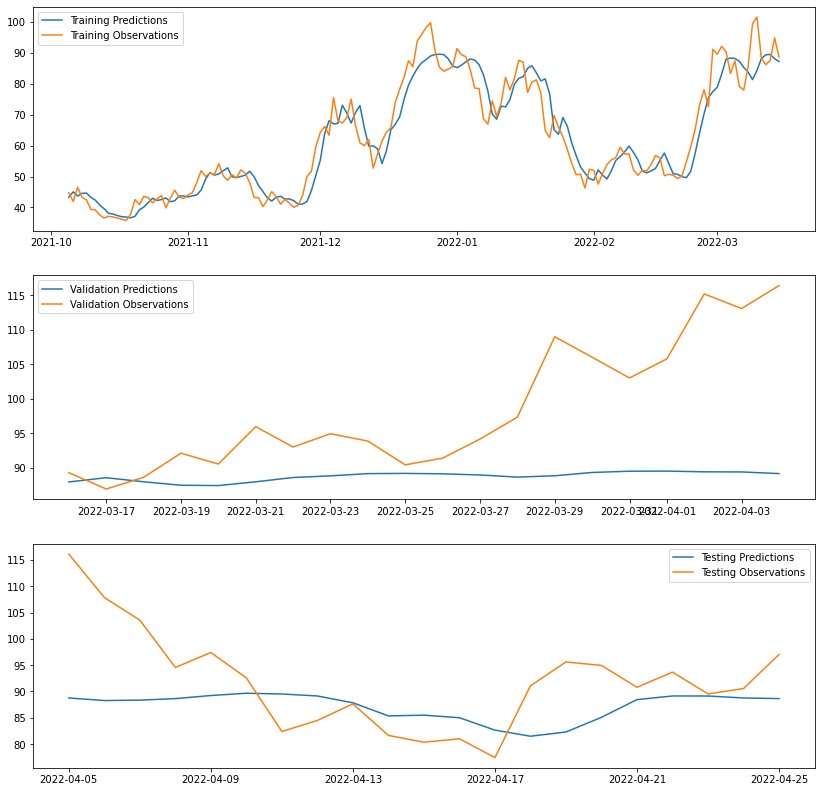

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

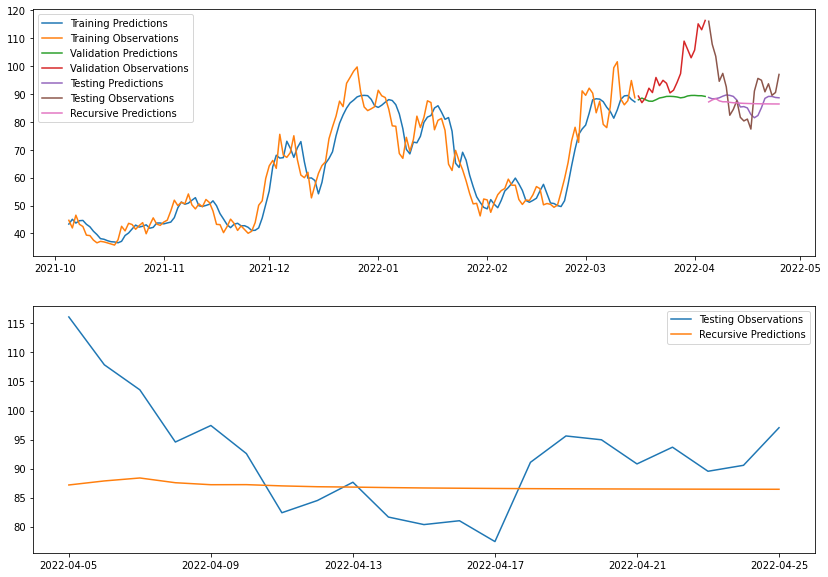

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')